In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Dense, Embedding, LSTM
from keras.utils import to_categorical
from tensorflow import keras

from IPython.display import display
import random
import matplotlib.pyplot as plt
# random.seed(10)

In [2]:
# Import Data
games_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Games/"
games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
games_2014 = pd.read_csv(games_folder_path + '2014.csv', index_col=False, parse_dates=['date'])
games_2015 = pd.read_csv(games_folder_path + '2015.csv', index_col=False, parse_dates=['date'])
games_2016 = pd.read_csv(games_folder_path + '2016.csv', index_col=False, parse_dates=['date'])
games_2017 = pd.read_csv(games_folder_path + '2017.csv', index_col=False, parse_dates=['date'])
games_2018 = pd.read_csv(games_folder_path + '2018.csv', index_col=False, parse_dates=['date'])
games_2019 = pd.read_csv(games_folder_path + '2019.csv', index_col=False, parse_dates=['date'])
games_2020 = pd.read_csv(games_folder_path + '2020.csv', index_col=False, parse_dates=['date'])
games_2021 = pd.read_csv(games_folder_path + '2021.csv', index_col=False, parse_dates=['date'])

all_games = pd.read_csv(games_folder_path + 'games_sorted.csv', index_col=False, parse_dates=['date'])

C:\Users\Craig\AppData\Local\Temp\ipykernel_7160\1834776661.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
C:\Users\Craig\AppData\Local\Temp\ipykernel_7160\1834776661.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
C:\Users\Craig\AppData\Local\Temp\ipykernel_7160\1834776661.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2014 = pd.read_csv(games_fol

In [3]:
y_true_2012 = games_2012['homeWin']
y_true_2013 = games_2013['homeWin']
y_true_2014 = games_2014['homeWin']
y_true_2015 = games_2015['homeWin']
y_true_2016 = games_2016['homeWin']
y_true_2017 = games_2017['homeWin']
y_true_2018 = games_2018['homeWin']
y_true_2019 = games_2019['homeWin']
y_true_2020 = games_2020['homeWin']
y_true_2021 = games_2021['homeWin']

with open("features.txt") as f:
    features = f.read().split('\n')
features.append('venue')
features.append('homeTeam')
features.append('awayTeam')

def set_columns(game_list):
    game_list = game_list[features]
    game_list.columns = game_list.columns.astype(str)
    return game_list

games_2012 = set_columns(games_2012)
games_2013 = set_columns(games_2013)
games_2014 = set_columns(games_2014)
games_2015 = set_columns(games_2015)
games_2016 = set_columns(games_2016)
games_2017 = set_columns(games_2017)
games_2018 = set_columns(games_2018)
games_2019 = set_columns(games_2019)
games_2020 = set_columns(games_2020)
games_2021 = set_columns(games_2021)

In [4]:
# One Hot Encoding Teams
encoding = LabelEncoder()
encoding.fit(all_games["homeTeam"].values)


def OHE_Teams(games):
    home_teams = encoding.transform(games["homeTeam"].values)
    away_teams = encoding.transform(games["awayTeam"].values)

    all_teams = np.vstack([home_teams, away_teams]).T
 
    oneHot = OneHotEncoder()
    X_teams = oneHot.fit_transform(all_teams).todense()
    X_teams = pd.DataFrame(X_teams)
    games = pd.concat([games, pd.DataFrame(X_teams)],axis=1)
    return games

games_2012 = OHE_Teams(games_2012)
games_2013 = OHE_Teams(games_2013)
games_2014 = OHE_Teams(games_2014)
games_2015 = OHE_Teams(games_2015)
games_2016 = OHE_Teams(games_2016)
games_2017 = OHE_Teams(games_2017)
games_2018 = OHE_Teams(games_2018)
games_2019 = OHE_Teams(games_2019)
games_2020 = OHE_Teams(games_2020)
games_2021 = OHE_Teams(games_2021)

all_games = OHE_Teams(all_games)

In [5]:
# One Hot Encoding Venues
encoding = LabelEncoder()
encoding.fit(all_games["venue"].values)
all_venues = all_games["venue"].values

all_venues = all_venues.reshape(-1,1)

def OHE_Venues(games):
    venues = games['venue'].values
    # all_venues = all_venues.reshape(-1,1)
    venues = venues.reshape(-1,1)
    oneHot = OneHotEncoder()

    oneHot.fit(all_venues)
    X_venues = oneHot.transform(venues).toarray()
    X_venues = pd.DataFrame(X_venues, columns=oneHot.categories_[0])
    games = pd.concat([games, X_venues], axis=1)
    return games

games_2012 = OHE_Venues(games_2012)
games_2013 = OHE_Venues(games_2013)
games_2014 = OHE_Venues(games_2014)
games_2015 = OHE_Venues(games_2015)
games_2016 = OHE_Venues(games_2016)
games_2017 = OHE_Venues(games_2017)
games_2018 = OHE_Venues(games_2018)
games_2019 = OHE_Venues(games_2019)
games_2020 = OHE_Venues(games_2020)
games_2021 = OHE_Venues(games_2021)

all_games = OHE_Venues(all_games)

In [6]:
def drop_columns(game_list):
    game_list = game_list.drop(['venue', 'homeTeam', 'awayTeam'],axis=1)
    game_list.columns = game_list.columns.astype(str)
    return game_list

games_2012 = drop_columns(games_2012)
games_2013 = drop_columns(games_2013)
games_2014 = drop_columns(games_2014)
games_2015 = drop_columns(games_2015)
games_2016 = drop_columns(games_2016)
games_2017 = drop_columns(games_2017)
games_2018 = drop_columns(games_2018)
games_2019 = drop_columns(games_2019)
games_2020 = drop_columns(games_2020)
games_2021 = drop_columns(games_2021)

all_games = drop_columns(all_games)

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
games_2012 = scaler.fit_transform(games_2012)
games_2013 = scaler.fit_transform(games_2013)
games_2014 = scaler.fit_transform(games_2014)
games_2015 = scaler.fit_transform(games_2015)
games_2016 = scaler.fit_transform(games_2016)
games_2017 = scaler.fit_transform(games_2017)
games_2018 = scaler.fit_transform(games_2018)
games_2019 = scaler.fit_transform(games_2019)
games_2020 = scaler.fit_transform(games_2020)
games_2021 = scaler.fit_transform(games_2021)

In [8]:
y_train_2012 = y_true_2012[9:171]
y_valid_2012 = y_true_2012[171:]

y_train_2013 = y_true_2013[9:171]
y_valid_2013 = y_true_2013[171:]

y_train_2014 = y_true_2014[9:171]
y_valid_2014 = y_true_2014[171:]

y_train_2015 = y_true_2015[9:170]
y_valid_2015 = y_true_2015[170:]

y_train_2016 = y_true_2016[9:171]
y_valid_2016 = y_true_2016[171:]

y_train_2017 = y_true_2017[9:171]
y_valid_2017 = y_true_2017[171:]

y_train_2018 = y_true_2018[9:171]
y_valid_2018 = y_true_2018[171:]

y_train_2019 = y_true_2019[9:171]
y_valid_2019 = y_true_2019[171:]

y_train_2020 = y_true_2020[9:127]
y_valid_2020 = y_true_2020[127:]

y_train_2021 = y_true_2021[9:171]
y_valid_2021 = y_true_2021[171:]

# y_train = y_true[:1447]
# y_valid = y_true[1447:1655]

In [9]:
# OHE Y values
oneHot = OneHotEncoder()
def OHE_y_values(y_val):
    y = np.vstack([y_val]).T
    
    # for i in range(len(y)):
    #     if y[i] == 1:
    #         y[i] = 0

    y_OHE = oneHot.fit_transform(y).toarray()

    return y_OHE


y_train_2012_OHE = OHE_y_values(y_train_2012)
y_valid_2012_OHE = OHE_y_values(y_valid_2012)

y_train_2013_OHE = OHE_y_values(y_train_2013)
y_valid_2013_OHE = OHE_y_values(y_valid_2013)

y_train_2014_OHE = OHE_y_values(y_train_2014)
y_valid_2014_OHE = OHE_y_values(y_valid_2014)

y_train_2015_OHE = OHE_y_values(y_train_2015)
y_valid_2015_OHE = OHE_y_values(y_valid_2015)

y_train_2016_OHE = OHE_y_values(y_train_2016)
y_valid_2016_OHE = OHE_y_values(y_valid_2016)

y_train_2017_OHE = OHE_y_values(y_train_2017)
y_valid_2017_OHE = OHE_y_values(y_valid_2017)

y_train_2018_OHE = OHE_y_values(y_train_2018)
y_valid_2018_OHE = OHE_y_values(y_valid_2018)

y_train_2019_OHE = OHE_y_values(y_train_2019)
y_valid_2019_OHE = OHE_y_values(y_valid_2019)

y_train_2020_OHE = OHE_y_values(y_train_2020)
y_valid_2020_OHE = OHE_y_values(y_valid_2020)

y_train_2021_OHE = OHE_y_values(y_train_2021)
y_valid_2021_OHE = OHE_y_values(y_valid_2021)

# y_train_OHE = OHE_y_values(y_train)
# y_valid_OHE = OHE_y_values(y_valid)

In [10]:
def set_window(games, pr, gpr):
    y = 0
    p = 0
    n = (games.shape[0] - (pr*gpr)) * (pr*gpr) + (games.shape[0] - (pr*gpr))
    step = (gpr * pr) + 1
    d_full = np.zeros(shape=(n,games.shape[1]))
    for x in range(0,d_full.shape[0],step): # Goes through index
        y = gpr * pr # link to previous round
        if x % step == 0:
            p += 1 # move to next round when 90 index is reached
        for i in range(gpr * pr): # fills out the first nine posistions in the window with previous games
                d_full[x+i] = games[p+i] # at pos x add corresponding previous game
        d_full[x+y] = games[x//step + y] # add game in question to final position


    # d_full = np.zeros(shape=(1980,75))
    # for x in range(0,d_full.shape[0],10): # Goes through index
    #     y = 9 # link to previous round
    #     if x % 90 == 0:
    #         p += 1 # move to next round when 90 index is reached
    #     for i in range(9): # fills out the first nine posistions in the window with previous games
    #             d_full[x+i] = games[p+i] # at pos x add corresponding previous game
    #     d_full[x+y] = games[x//10 + y] # add game in question to final position
        
    d_Train = d_full[:1620]
    d_valid = d_full[1620:]
    d_Train = np.reshape(d_Train, (162, 10,75))
    d_valid = np.reshape(d_valid, (36, 10, 75))
    return d_Train, d_valid

x_train_2012, x_valid_2012 = set_window(games_2012, 1,9)
x_train_2013, x_valid_2013 = set_window(games_2013, 1,9)
x_train_2014, x_valid_2014 = set_window(games_2014, 1,9)
# x_train_2015, x_valid_2015 = set_window(games_2015)
x_train_2016, x_valid_2016 = set_window(games_2016, 1,9)
x_train_2017, x_valid_2017 = set_window(games_2017, 1,9)
x_train_2018, x_valid_2018 = set_window(games_2018, 1,9)
x_train_2019, x_valid_2019 = set_window(games_2019, 1,9)
# x_train_2020, x_valid_2020 = set_window(games_2020)

x_train_2021, x_valid_2021 = set_window(games_2021,1,9)

In [55]:
def set_window(games, pr, gpr):
    y = 0
    p = 0
    n = (games.shape[0] - (pr*gpr)) * (pr*gpr) + (games.shape[0] - (pr*gpr))
    step = (gpr * pr) + 1
    d_full = np.zeros(shape=(n,games.shape[1]))
    for x in range(0,d_full.shape[0],step): # Goes through index
        y = gpr * pr # link to previous round
        if x % step == 0:
            p += 1 # move to next round when 90 index is reached
        for i in range(gpr * pr): # fills out the first nine posistions in the window with previous games
                d_full[x+i] = games[p+i] # at pos x add corresponding previous game
        d_full[x+y] = games[x//step + y] # add game in question to final position
        
    d_Train = d_full[:n-(36*step)]
    d_valid = d_full[(n-36*step):]
    d_Train = np.reshape(d_Train, (n/step, step, games.shape[1]))
    d_valid = np.reshape(d_valid, (36, step, games.shape[1]))
    return d_Train, d_valid

In [11]:
def set_window_2015(games):
    y = 0
    p = 0
    d_full = np.zeros(shape=(1970,75))
    for x in range(0,d_full.shape[0],10): # Goes through index for each round
        y = 9 # link to previous round
        if x % 90 == 0:
            p += 1 # move to next round when 90 index is reached
        for i in range(9): # fills out the first nine posistions in the window with previous games
                d_full[x+i] = games[p+i] # at pos x add corresponding previous game
            
        d_full[x+y] = games[x//10 + y] # add game in question to final position
        
    d_Train = d_full[:1610]
    d_valid = d_full[1610:]
    d_Train = np.reshape(d_Train, (161, 10,75))
    d_valid = np.reshape(d_valid, (36, 10, 75))
    return d_Train, d_valid

x_train_2015, x_valid_2015 = set_window_2015(games_2015)


In [101]:
def train_model_1( xTrain, yTrain, xValid , yValid):
    random.seed(26)
    model = Sequential()
    model.add(LSTM( 32 ,input_shape = (10,75), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3))
    model.add(Dense(2, activation="tanh"))
    model.build()   
    model.summary()
    model.compile( optimizer = "adam" , loss = 'mean_squared_error' , metrics = ['accuracy', 'mse'])

    reduce_lr = ReduceLROnPlateau( monitor = 'accuracy', factor = 0.01, patience=10, cooldown=0)
    
    callbacks = [ reduce_lr ]
    train_history = model.fit( xTrain, yTrain , epochs = 50, shuffle=False, callbacks=callbacks, verbose = 2, validation_split = 0.1)

    score = model.evaluate( xValid , yValid )
    pred = model.predict(xValid)
    model.save("LSTM_1")
    
    print( "Accuracy: {:0.4}".format( score[1] ))
    print( "Loss:", score[0] )
    return score, pred, train_history


In [105]:
results_2012, pred_2012, history_2012 = train_model_1(x_train_2012, y_train_2012_OHE, x_valid_2012, y_valid_2012_OHE) 
results_2013, pred_2013, history_2013 = train_model_1(x_train_2013, y_train_2013_OHE, x_valid_2013, y_valid_2013_OHE) 
results_2014, pred_2014, history_2014 = train_model_1(x_train_2014, y_train_2014_OHE, x_valid_2014, y_valid_2014_OHE) 
results_2015, pred_2015, history_2015 = train_model_1(x_train_2015, y_train_2015_OHE, x_valid_2015, y_valid_2015_OHE) 
results_2016, pred_2016, history_2016 = train_model_1(x_train_2016, y_train_2016_OHE, x_valid_2016, y_valid_2016_OHE) 
results_2017, pred_2017, history_2017 = train_model_1(x_train_2017, y_train_2017_OHE, x_valid_2017, y_valid_2017_OHE) 
results_2018, pred_2018, history_2018 = train_model_1(x_train_2018, y_train_2018_OHE, x_valid_2018, y_valid_2018_OHE) 
results_2019, pred_2019, history_2019 = train_model_1(x_train_2019, y_train_2019_OHE, x_valid_2019, y_valid_2019_OHE)

Model: "sequential_170"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_170 (LSTM)             (None, 32)                13824     
                                                                 
 dense_170 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4376 - accuracy: 0.5655 - mse: 0.4376 - val_loss: 0.2817 - val_accuracy: 0.7059 - val_mse: 0.2817 - lr: 0.0010 - 4s/epoch - 781ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2676 - accuracy: 0.6207 - mse: 0.2676 - val_loss: 0.2519 - val_accuracy: 0.4118 - val_mse: 0.2519 - lr: 0.0010 - 77ms/epoch - 15ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2443 - accuracy: 0.6000 - mse: 0.2443 - val_loss: 0.2822 - val_accuracy: 0.4118 - v

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6944
Loss: 0.20406880974769592
Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_171 (LSTM)             (None, 32)                13824     
                                                                 
 dense_171 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4592 - accuracy: 0.5241 - mse: 0.4592 - val_loss: 0.3164 - val_accuracy: 0.5294 - val_mse: 0.3164 - lr: 0.0010 - 4s/epoch - 740ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2951 - accuracy: 0.5517 - mse: 0.2951 - val_loss: 0.2618 - val_accuracy: 0.5294 - val_mse: 0.2618 - lr: 0.0010 - 80ms/epoch - 16ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2646 - accuracy: 0.5724 - mse: 0.2646 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6667
Loss: 0.20726865530014038
Model: "sequential_172"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_172 (LSTM)             (None, 32)                13824     
                                                                 
 dense_172 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4525 - accuracy: 0.5586 - mse: 0.4525 - val_loss: 0.2914 - val_accuracy: 0.5882 - val_mse: 0.2914 - lr: 0.0010 - 4s/epoch - 764ms/step
Epoch 2/50
5/5 - 0s - loss: 0.3024 - accuracy: 0.5517 - mse: 0.3024 - val_loss: 0.2396 - val_accuracy: 0.6471 - val_mse: 0.2396 - lr: 0.0010 - 84ms/epoch - 17ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2628 - accuracy: 0.5586 - mse: 0.2628 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6667
Loss: 0.22338898479938507
Model: "sequential_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_173 (LSTM)             (None, 32)                13824     
                                                                 
 dense_173 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4497 - accuracy: 0.4861 - mse: 0.4497 - val_loss: 0.2689 - val_accuracy: 0.5882 - val_mse: 0.2689 - lr: 0.0010 - 4s/epoch - 798ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2959 - accuracy: 0.5347 - mse: 0.2959 - val_loss: 0.2487 - val_accuracy: 0.5294 - val_mse: 0.2487 - lr: 0.0010 - 80ms/epoch - 16ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2695 - accuracy: 0.5069 - mse: 0.2695 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6111
Loss: 0.20801305770874023
Model: "sequential_174"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_174 (LSTM)             (None, 32)                13824     
                                                                 
 dense_174 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4298 - accuracy: 0.6000 - mse: 0.4298 - val_loss: 0.2481 - val_accuracy: 0.7059 - val_mse: 0.2481 - lr: 0.0010 - 4s/epoch - 766ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2608 - accuracy: 0.6207 - mse: 0.2608 - val_loss: 0.2104 - val_accuracy: 0.7059 - val_mse: 0.2104 - lr: 0.0010 - 81ms/epoch - 16ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2495 - accuracy: 0.6000 - mse: 0.2495 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6944
Loss: 0.21947422623634338
Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_175 (LSTM)             (None, 32)                13824     
                                                                 
 dense_175 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4678 - accuracy: 0.5379 - mse: 0.4678 - val_loss: 0.2689 - val_accuracy: 0.6471 - val_mse: 0.2689 - lr: 0.0010 - 4s/epoch - 799ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2882 - accuracy: 0.6069 - mse: 0.2882 - val_loss: 0.2352 - val_accuracy: 0.6471 - val_mse: 0.2352 - lr: 0.0010 - 82ms/epoch - 16ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2612 - accuracy: 0.5379 - mse: 0.2612 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.7222
Loss: 0.1927671730518341
Model: "sequential_176"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_176 (LSTM)             (None, 32)                13824     
                                                                 
 dense_176 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4345 - accuracy: 0.5448 - mse: 0.4345 - val_loss: 0.2975 - val_accuracy: 0.5882 - val_mse: 0.2975 - lr: 0.0010 - 4s/epoch - 766ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2875 - accuracy: 0.4690 - mse: 0.2875 - val_loss: 0.2466 - val_accuracy: 0.6471 - val_mse: 0.2466 - lr: 0.0010 - 86ms/epoch - 17ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2699 - accuracy: 0.4828 - mse: 0.2699 - v

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.75
Loss: 0.19704467058181763
Model: "sequential_177"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_177 (LSTM)             (None, 32)                13824     
                                                                 
 dense_177 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4180 - accuracy: 0.5655 - mse: 0.4180 - val_loss: 0.3008 - val_accuracy: 0.5882 - val_mse: 0.3008 - lr: 0.0010 - 4s/epoch - 784ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2633 - accuracy: 0.6000 - mse: 0.2633 - val_loss: 0.2528 - val_accuracy: 0.4118 - val_mse: 0.2528 - lr: 0.0010 - 86ms/epoch - 17ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2647 - accuracy: 0.5241 - mse: 0.2647 - va

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.7222
Loss: 0.2260429561138153


In [106]:
results = pd.DataFrame(data = [results_2012[:2],results_2013[:2],results_2014[:2],results_2015[:2],results_2016[:2],
                               results_2017[:2],results_2018[:2],results_2019[:2]],
                            index = ['2012', '2013', '2014','2015','2016','2017','2018','2019'],
                            columns = ['loss', 'accuracy'])
sum(results['accuracy'])/8


0.6909722164273262

In [27]:
def build_conf_matrix(prediction, true):
    s = 0
    pl = []
    for pred in prediction:
        if pred[0] > pred[1]:
            pl.append(0)
        else:
            pl.append(1)

    for i in range(len(pl)):
        if pl[i] == true.values[i]: 
            s+=1

    c_train = confusion_matrix(true, pl)
    disp = ConfusionMatrixDisplay(c_train)
    return disp

# cf_2012 = build_conf_matrix(pred_2012, y_valid_2012)
# cf_2013 = build_conf_matrix(pred_2013, y_valid_2013)
# cf_2014 = build_conf_matrix(pred_2014, y_valid_2014)
# cf_2015 = build_conf_matrix(pred_2015, y_valid_2015)
# cf_2016 = build_conf_matrix(pred_2016, y_valid_2016)
# cf_2017 = build_conf_matrix(pred_2017, y_valid_2017)
# cf_2018 = build_conf_matrix(pred_2018, y_valid_2018)
# cf_2019 = build_conf_matrix(pred_2019, y_valid_2019)


# fig, ax = plt.subplots(3,3)
# fig.set_figwidth(10)
# fig.set_figheight(12)
# fig.suptitle("Confusion Matrices: LSTM Model 1 Training/Validation Set 69%")
# cf_2012.plot(ax=ax[0][0]), cf_2013.plot(ax=ax[0][1]), cf_2014.plot(ax=ax[0][2])
# cf_2015.plot(ax=ax[1][0]), cf_2016.plot(ax=ax[1][1]), cf_2017.plot(ax=ax[1][2])
# cf_2018.plot(ax=ax[2][0]), cf_2019.plot(ax=ax[2][1])

# ax[0][0].set_title(2012), ax[0][1].set_title(2013), ax[0][2].set_title(2014)
# ax[1][0].set_title(2015), ax[1][1].set_title(2016), ax[1][2].set_title(2017)
# ax[2][0].set_title(2018), ax[2][1].set_title(2019)

In [109]:
average_loss = [0 for i in range(50)]
average_val_loss = [0 for i in range(50)]
average_accuracy = [0 for i in range(50)]
average_val_accuracy = [0 for i in range(50)]

h_list = [history_2012, history_2013, history_2014, history_2015, history_2016, history_2017, history_2018, history_2019]
for year in h_list:
    for i in range(50):
        average_loss[i] += (year.history['loss'][i])
        average_val_loss[i] += (year.history['val_loss'][i])
        average_accuracy[i] += (year.history['accuracy'][i])
        average_val_accuracy[i] += (year.history['val_accuracy'][i])

for i in range(50):
    average_loss[i] = average_loss[i]/8

for i in range(50):
    average_val_loss[i] = average_val_loss[i]/8

for i in range(50):
    average_accuracy[i] = average_accuracy[i]/8

for i in range(50):
    average_val_accuracy[i] = average_val_accuracy[i]/8



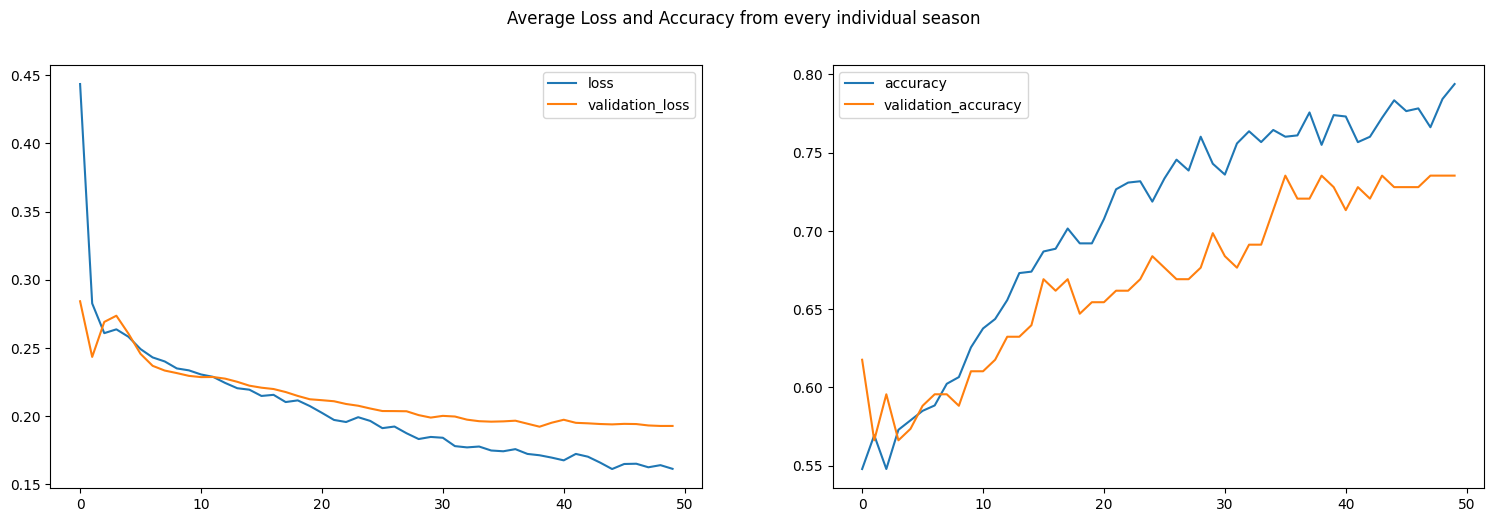

In [374]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle('Average Loss and Accuracy from every individual season')
plt.subplot(1,2,1)
plt.plot(average_loss)
plt.plot(average_val_loss)
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(average_accuracy)
plt.plot(average_val_accuracy)
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

In [149]:
x_train_all = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019), axis=0)
y_train_all = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE))

x_test = np.concatenate((x_train_2021, x_valid_2021))
y_test = np.concatenate((y_train_2021_OHE, y_valid_2021_OHE))

In [299]:
def train_model_final( xTrain, yTrain, xValid , yValid):
    random.seed(26)
    model = Sequential()
    model.add(LSTM( 32 ,input_shape = (10,75), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3))
    model.add(Dense(2, activation="tanh"))
    model.build()   
    model.summary()
    model.compile( optimizer = "adam" , loss = 'mean_squared_error' , metrics = ['accuracy', 'mse'])

    reduce_lr = ReduceLROnPlateau( monitor = 'accuracy', factor = 0.01, patience=10, cooldown=0)
    
    callbacks = [ reduce_lr ]
    train_history = model.fit( xTrain, yTrain , epochs = 50, shuffle=False, callbacks=callbacks, verbose = 2, validation_split = 0.1)
    
    score = model.evaluate( xValid , yValid )
    pred = model.predict(xValid)
    model.save("LSTM_Final")

    # model_transfer = keras.models.load_model('C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats/LSTM_1_69')
    # model_transfer.fit(xValid, yValid)

    print( "Accuracy: {:0.4}".format( score[1] ))
    print( "Loss:", score[0] )
    return score, pred, train_history


In [152]:
results_final, pred_final, history_final = train_model_final(x_train_all, y_train_all, x_test, y_test)

Model: "sequential_186"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_186 (LSTM)             (None, 32)                13824     
                                                                 
 dense_186 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
45/45 - 4s - loss: 0.2825 - accuracy: 0.5309 - mse: 0.2825 - val_loss: 0.2356 - val_accuracy: 0.6101 - val_mse: 0.2356 - lr: 0.0010 - 4s/epoch - 97ms/step
Epoch 2/50
45/45 - 0s - loss: 0.2430 - accuracy: 0.5857 - mse: 0.2430 - val_loss: 0.2300 - val_accuracy: 0.6038 - val_mse: 0.2300 - lr: 0.0010 - 408ms/epoch - 9ms/step
Epoch 3/50
45/45 - 0s - loss: 0.2309 - accuracy: 0.6334 - mse: 0.2309 - val_loss: 0.2235 - val_accuracy: 0.641

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5606
Loss: 0.24505019187927246


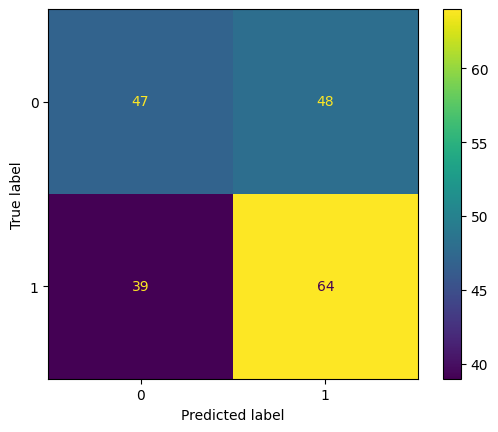

In [158]:
cf_final = build_conf_matrix(pred_final, y_true_2021[9:])
cf_final.plot()
plt.show()

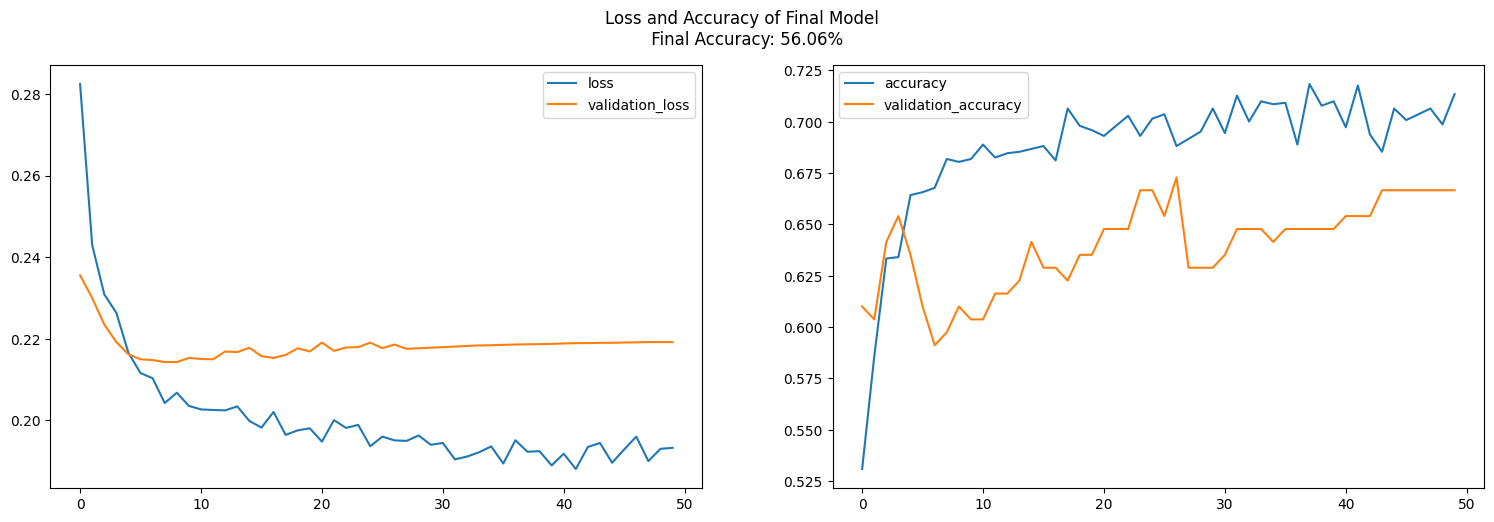

In [375]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy of Final Model \n Final Accuracy: {"{:.2f}".format(results_final[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

In [238]:
x_train_all_r4 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:27]), axis=0)
y_train_all_r4 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:27]))

x_test_r4 = np.concatenate((x_train_2021[27:], x_valid_2021))
y_test_r4 = np.concatenate((y_train_2021_OHE[27:], y_valid_2021_OHE))

results_final_r4, pred_final_r4, history_final_r4 = train_model_final(x_train_all_r4, y_train_all_r4, x_test_r4, y_test_r4)

cf_final_r4 = build_conf_matrix(pred_final_r4, y_true_2021[36:])
cf_final_r4.plot()
plt.title(f'Round 4 Accuracy: {"{:.2f}".format(results_final_r4[1])}')
plt.show()

Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_200 (LSTM)             (None, 32)                13824     
                                                                 
 dense_200 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
46/46 - 4s - loss: 0.2836 - accuracy: 0.5480 - mse: 0.2836 - val_loss: 0.2361 - val_accuracy: 0.6211 - val_mse: 0.2361 - lr: 0.0010 - 4s/epoch - 88ms/step
Epoch 2/50
46/46 - 0s - loss: 0.2428 - accuracy: 0.5832 - mse: 0.2428 - val_loss: 0.2314 - val_accuracy: 0.6211 - val_mse: 0.2314 - lr: 0.0010 - 386ms/epoch - 8ms/step
Epoch 3/50
46/46 - 0s - loss: 0.2333 - accuracy: 0.6142 - mse: 0.2333 - val_loss: 0.2262 - val_accuracy: 0.658

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5731
Loss: 0.24792587757110596


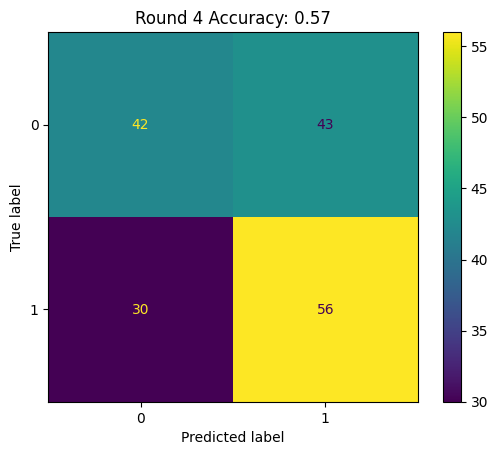

Model: "sequential_210"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_210 (LSTM)             (None, 32)                13824     
                                                                 
 dense_210 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
47/47 - 5s - loss: 0.2818 - accuracy: 0.5513 - mse: 0.2818 - val_loss: 0.2408 - val_accuracy: 0.5732 - val_mse: 0.2408 - lr: 0.0010 - 5s/epoch - 97ms/step
Epoch 2/50
47/47 - 0s - loss: 0.2433 - accuracy: 0.5743 - mse: 0.2433 - val_loss: 0.2367 - val_accuracy: 0.6037 - val_mse: 0.2367 - lr: 0.0010 - 426ms/epoch - 9ms/step
Epoch 3/50
47/47 - 0s - loss: 0.2323 - accuracy: 0.6300 - mse: 0.2323 - val_loss: 0.2340 - val_accuracy: 0.634

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5694
Loss: 0.24216842651367188


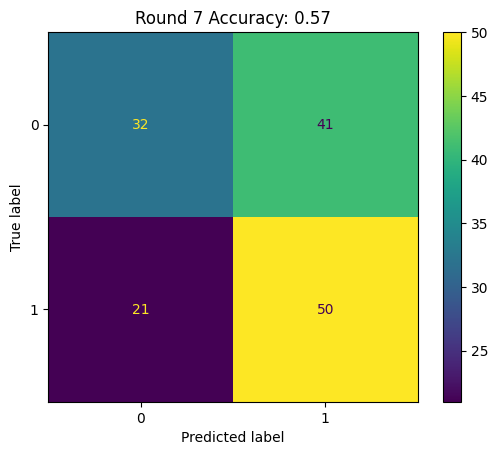

In [255]:
x_train_all_r7 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:54]), axis=0)
y_train_all_r7 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:54]))

x_test_r7 = np.concatenate((x_train_2021[54:], x_valid_2021))
y_test_r7 = np.concatenate((y_train_2021_OHE[54:], y_valid_2021_OHE))

results_final_r7, pred_final_r7, history_final_r7 = train_model_final(x_train_all_r7, y_train_all_r7, x_test_r7, y_test_r7)

cf_final_r7 = build_conf_matrix(pred_final_r7, y_true_2021[63:])
cf_final_r7.plot()
plt.title(f'Round 7 Accuracy: {"{:.2f}".format(results_final_r7[1])}')
plt.show()

Model: "sequential_211"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_211 (LSTM)             (None, 32)                13824     
                                                                 
 dense_211 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
47/47 - 4s - loss: 0.2819 - accuracy: 0.5444 - mse: 0.2819 - val_loss: 0.2406 - val_accuracy: 0.5928 - val_mse: 0.2406 - lr: 0.0010 - 4s/epoch - 91ms/step
Epoch 2/50
47/47 - 0s - loss: 0.2413 - accuracy: 0.5772 - mse: 0.2413 - val_loss: 0.2360 - val_accuracy: 0.5928 - val_mse: 0.2360 - lr: 0.0010 - 414ms/epoch - 9ms/step
Epoch 3/50
47/47 - 0s - loss: 0.2302 - accuracy: 0.6192 - mse: 0.2302 - val_loss: 0.2322 - val_accuracy: 0.616

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5812
Loss: 0.25394895672798157


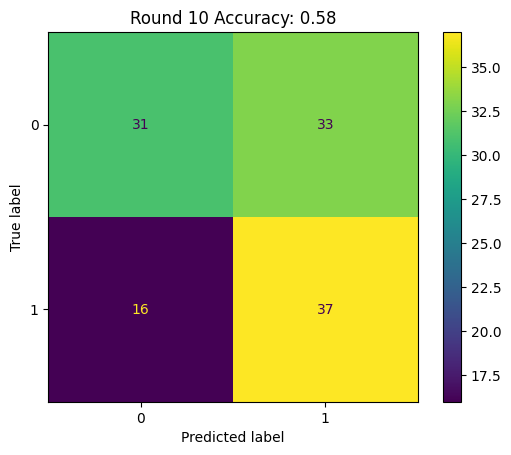

In [256]:
x_train_all_r10 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:81]), axis=0)
y_train_all_r10 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:81]))

x_test_r10 = np.concatenate((x_train_2021[81:], x_valid_2021))
y_test_r10 = np.concatenate((y_train_2021_OHE[81:], y_valid_2021_OHE))

results_final_r10, pred_final_r10, history_final_r10 = train_model_final(x_train_all_r10, y_train_all_r10, x_test_r10, y_test_r10)

cf_final_r10 = build_conf_matrix(pred_final_r10, y_true_2021[90:])
cf_final_r10.plot()
plt.title(f'Round 10 Accuracy: {"{:.2f}".format(results_final_r10[1])}')
plt.show()

Model: "sequential_223"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_223 (LSTM)             (None, 32)                13824     
                                                                 
 dense_223 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
48/48 - 5s - loss: 0.2789 - accuracy: 0.5562 - mse: 0.2789 - val_loss: 0.2410 - val_accuracy: 0.5588 - val_mse: 0.2410 - lr: 0.0010 - 5s/epoch - 103ms/step
Epoch 2/50
48/48 - 0s - loss: 0.2410 - accuracy: 0.5865 - mse: 0.2410 - val_loss: 0.2352 - val_accuracy: 0.6000 - val_mse: 0.2352 - lr: 0.0010 - 448ms/epoch - 9ms/step
Epoch 3/50
48/48 - 0s - loss: 0.2323 - accuracy: 0.6160 - mse: 0.2323 - val_loss: 0.2306 - val_accuracy: 0.61

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5556
Loss: 0.2549756169319153


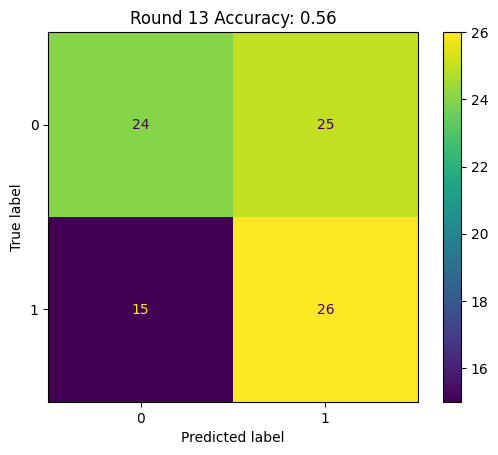

In [268]:
x_train_all_r13 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:108]), axis=0)
y_train_all_r13 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:108]))

x_test_r13 = np.concatenate((x_train_2021[108:], x_valid_2021))
y_test_r13 = np.concatenate((y_train_2021_OHE[108:], y_valid_2021_OHE))

results_final_r13, pred_final_r13, history_final_r13 = train_model_final(x_train_all_r13, y_train_all_r13, x_test_r13, y_test_r13)

cf_final_r13 = build_conf_matrix(pred_final_r13, y_true_2021[117:])
cf_final_r13.plot()
plt.title(f'Round 13 Accuracy: {"{:.2f}".format(results_final_r13[1])}')
plt.show()

Model: "sequential_215"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_215 (LSTM)             (None, 32)                13824     
                                                                 
 dense_215 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
49/49 - 4s - loss: 0.2801 - accuracy: 0.5498 - mse: 0.2801 - val_loss: 0.2460 - val_accuracy: 0.5349 - val_mse: 0.2460 - lr: 0.0010 - 4s/epoch - 89ms/step
Epoch 2/50
49/49 - 0s - loss: 0.2393 - accuracy: 0.5938 - mse: 0.2393 - val_loss: 0.2399 - val_accuracy: 0.5349 - val_mse: 0.2399 - lr: 0.0010 - 447ms/epoch - 9ms/step
Epoch 3/50
49/49 - 0s - loss: 0.2314 - accuracy: 0.6274 - mse: 0.2314 - val_loss: 0.2355 - val_accuracy: 0.575

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5873
Loss: 0.2342759221792221


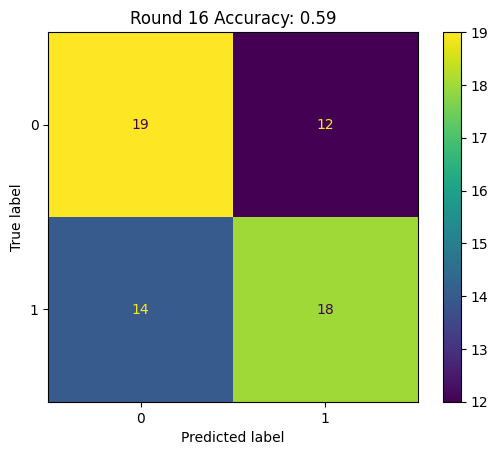

In [260]:
x_train_all_r16 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:135]), axis=0)
y_train_all_r16 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:135]))

x_test_r16 = np.concatenate((x_train_2021[135:], x_valid_2021))
y_test_r16 = np.concatenate((y_train_2021_OHE[135:], y_valid_2021_OHE))

results_final_r16, pred_final_r16, history_final_r16 = train_model_final(x_train_all_r16, y_train_all_r16, x_test_r16, y_test_r16)

cf_final_r16 = build_conf_matrix(pred_final_r16, y_true_2021[144:])
cf_final_r16.plot()
plt.title(f'Round 16 Accuracy: {"{:.2f}".format(results_final_r16[1])}')
plt.show()

Model: "sequential_232"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_232 (LSTM)             (None, 32)                13824     
                                                                 
 dense_232 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 - 4s - loss: 0.2787 - accuracy: 0.5408 - mse: 0.2787 - val_loss: 0.2500 - val_accuracy: 0.5143 - val_mse: 0.2500 - lr: 0.0010 - 4s/epoch - 84ms/step
Epoch 2/50
50/50 - 0s - loss: 0.2407 - accuracy: 0.5911 - mse: 0.2407 - val_loss: 0.2429 - val_accuracy: 0.5543 - val_mse: 0.2429 - lr: 0.0010 - 410ms/epoch - 8ms/step
Epoch 3/50
50/50 - 0s - loss: 0.2303 - accuracy: 0.6191 - mse: 0.2303 - val_loss: 0.2379 - val_accuracy: 0.554

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5556
Loss: 0.25679630041122437


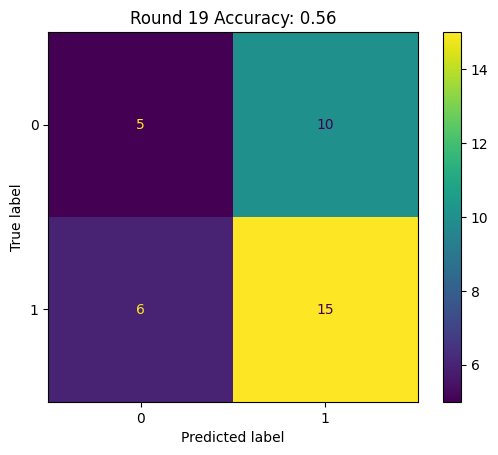

In [284]:
x_train_all_r19 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:162]), axis=0)
y_train_all_r19 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:162]))

x_test_r19 = np.concatenate((x_train_2021[162:], x_valid_2021))
y_test_r19 = np.concatenate((y_train_2021_OHE[162:], y_valid_2021_OHE))

results_final_r19, pred_final_r19, history_final_r19 = train_model_final(x_train_all_r19, y_train_all_r19, x_test_r19, y_test_r19)

cf_final_r19 = build_conf_matrix(pred_final_r19, y_true_2021[171:])
cf_final_r19.plot()
plt.title(f'Round 19 Accuracy: {"{:.2f}".format(results_final_r19[1])}')
plt.show()

(Text(0.5, 1.0, 'Round 16: 58.73%'), Text(0.5, 1.0, 'Round 19: 55.56%'))

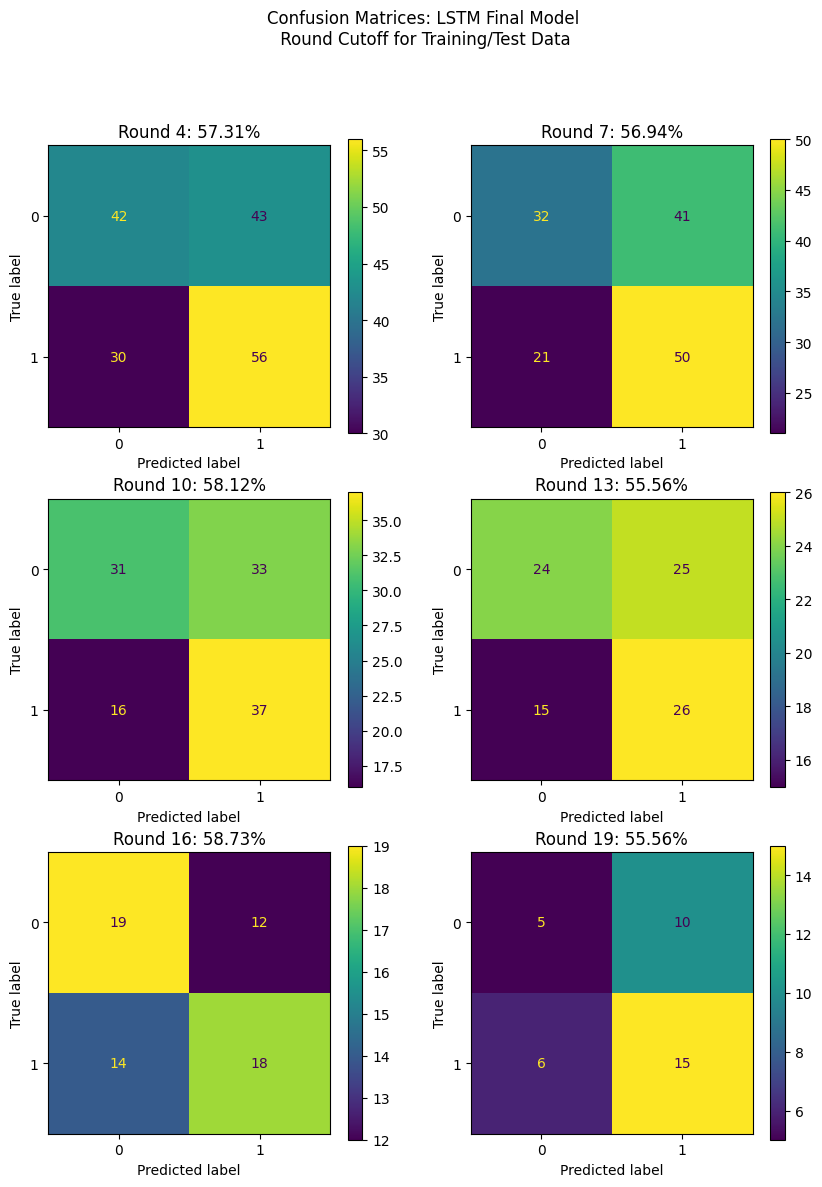

In [367]:
fig, ax = plt.subplots(3,2)
fig.set_figwidth(10)
fig.set_figheight(13)
fig.suptitle("Confusion Matrices: LSTM Final Model\n Round Cutoff for Training/Test Data")
cf_final_r4.plot(ax=ax[0][0]), cf_final_r7.plot(ax=ax[0][1])
cf_final_r10.plot(ax=ax[1][0]), cf_final_r13.plot(ax=ax[1][1])
cf_final_r16.plot(ax=ax[2][0]), cf_final_r19.plot(ax=ax[2][1])

ax[0][0].set_title(f'Round 4: {"{:.2f}".format(results_final_r4[1]*100)}%'), ax[0][1].set_title(f'Round 7: {"{:.2f}".format(results_final_r7[1]*100)}%')
ax[1][0].set_title(f'Round 10: {"{:.2f}".format(results_final_r10[1]*100)}%'), ax[1][1].set_title(f'Round 13: {"{:.2f}".format(results_final_r13[1]*100)}%')
ax[2][0].set_title(f'Round 16: {"{:.2f}".format(results_final_r16[1]*100)}%'), ax[2][1].set_title(f'Round 19: {"{:.2f}".format(results_final_r19[1]*100)}%')

In [12]:
def train_model_exp( xTrain, yTrain, xValid , yValid):
    random.seed(26)
    model = Sequential()
    model.add(LSTM( 32 ,input_shape = (10,75), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3))
    model.add(Dense(2, activation="tanh"))
    model.build()   
    model.summary()
    model.compile( optimizer = "adam" , loss = 'mean_squared_error' , metrics = ['accuracy', 'mse'])

    reduce_lr = ReduceLROnPlateau( monitor = 'val_accuracy', factor = 0.01, patience=10, cooldown=0)
    
    callbacks = [ reduce_lr ]
    train_history = model.fit( xTrain, yTrain , epochs = 50, shuffle=False, callbacks=callbacks, verbose = 2, validation_split = 0.1)
    
    score = model.evaluate( xValid , yValid )
    pred = model.predict(xValid)
    
    print( "Accuracy: {:0.4}".format( score[1] ))
    print( "Loss:", score[0] )
    return score, pred, train_history


In [28]:
def increment(x_train, x_valid, y_train, y_valid, r):
    x_train_r = x_train[:9 * (r-1)]
    y_train_r = y_train[:9 * (r-1)]
    x_test_r = np.concatenate((x_train[9 * (r-1):], x_valid))
    y_test_r = np.concatenate((y_train[9 * (r-1):], y_valid))

    results, pred, history = train_model_exp(x_train_r, y_train_r, x_test_r, y_test_r)

    test_acc = results[1] * 100

    return [test_acc, history]

r_4_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,4)
r_4_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,4)
r_4_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,4)
r_4_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,4)
r_4_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,4)
r_4_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,4)
r_4_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,4)
r_4_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,4)
r_4_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,4)

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 32)                13824     
                                                                 
 dense_54 (Dense)            (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 4s - loss: 0.4363 - accuracy: 0.7500 - mse: 0.4363 - val_loss: 0.4635 - val_accuracy: 0.6667 - val_mse: 0.4635 - lr: 0.0010 - 4s/epoch - 4s/step
Epoch 2/50
1/1 - 0s - loss: 0.3500 - accuracy: 0.7917 - mse: 0.3500 - val_loss: 0.4134 - val_accuracy: 0.6667 - val_mse: 0.4134 - lr: 0.0010 - 47ms/epoch - 47ms/step
Epoch 3/50
1/1 - 0s - loss: 0.3262 - accuracy: 0.7500 - mse: 0.3262 - val_loss: 0.3713 - val_accuracy: 0.6667 - val_m

In [36]:
r_5_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,5)
r_5_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,5)
r_5_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,5)
r_5_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,5)
r_5_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,5)
r_5_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,5)
r_5_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,5)
r_5_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,5)
r_5_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,5)

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_108 (LSTM)             (None, 32)                13824     
                                                                 
 dense_108 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 4s - loss: 0.4614 - accuracy: 0.6562 - mse: 0.4614 - val_loss: 0.5691 - val_accuracy: 0.2500 - val_mse: 0.5691 - lr: 0.0010 - 4s/epoch - 4s/step
Epoch 2/50
1/1 - 0s - loss: 0.3961 - accuracy: 0.7188 - mse: 0.3961 - val_loss: 0.5055 - val_accuracy: 0.2500 - val_mse: 0.5055 - lr: 0.0010 - 44ms/epoch - 44ms/step
Epoch 3/50
1/1 - 0s - loss: 0.3530 - accuracy: 0.6562 - mse: 0.3530 - val_loss: 0.4497 - val_accuracy: 0.2500 - val_

In [37]:
r_6_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,6)
r_6_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,6)
r_6_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,6)
r_6_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,6)
r_6_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,6)
r_6_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,6)
r_6_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,6)
r_6_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,6)
r_6_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,6)

Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_117 (LSTM)             (None, 32)                13824     
                                                                 
 dense_117 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 - 5s - loss: 0.5057 - accuracy: 0.5750 - mse: 0.5057 - val_loss: 0.5571 - val_accuracy: 0.4000 - val_mse: 0.5571 - lr: 0.0010 - 5s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 0.3871 - accuracy: 0.6000 - mse: 0.3871 - val_loss: 0.4338 - val_accuracy: 0.4000 - val_mse: 0.4338 - lr: 0.0010 - 68ms/epoch - 34ms/step
Epoch 3/50
2/2 - 0s - loss: 0.3117 - accuracy: 0.6500 - mse: 0.3117 - val_loss: 0.3452 - val_accuracy: 0.4000 - val_

In [29]:
r_7_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,7)
r_7_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,7)
r_7_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,7)
r_7_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,7)
r_7_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,7)
r_7_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,7)
r_7_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,7)
r_7_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,7)
r_7_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,7)

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 32)                13824     
                                                                 
 dense_63 (Dense)            (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 - 4s - loss: 0.4925 - accuracy: 0.6042 - mse: 0.4925 - val_loss: 0.4047 - val_accuracy: 0.6667 - val_mse: 0.4047 - lr: 0.0010 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 0.3959 - accuracy: 0.5833 - mse: 0.3959 - val_loss: 0.3164 - val_accuracy: 0.6667 - val_mse: 0.3164 - lr: 0.0010 - 71ms/epoch - 35ms/step
Epoch 3/50
2/2 - 0s - loss: 0.2958 - accuracy: 0.6667 - mse: 0.2958 - val_loss: 0.2687 - val_accuracy: 0.6667 - val_m

In [38]:
r_8_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,8)
r_8_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,8)
r_8_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,8)
r_8_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,8)
r_8_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,8)
r_8_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,8)
r_8_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,8)
r_8_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,8)
r_8_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,8)

Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_126 (LSTM)             (None, 32)                13824     
                                                                 
 dense_126 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 - 4s - loss: 0.5185 - accuracy: 0.6071 - mse: 0.5185 - val_loss: 0.3339 - val_accuracy: 0.8571 - val_mse: 0.3339 - lr: 0.0010 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 0.3836 - accuracy: 0.6429 - mse: 0.3836 - val_loss: 0.2411 - val_accuracy: 0.8571 - val_mse: 0.2411 - lr: 0.0010 - 53ms/epoch - 26ms/step
Epoch 3/50
2/2 - 0s - loss: 0.2776 - accuracy: 0.6607 - mse: 0.2776 - val_loss: 0.1915 - val_accuracy: 0.8571 - val_

In [39]:
r_9_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,9)
r_9_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,9)
r_9_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,9)
r_9_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,9)
r_9_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,9)
r_9_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,9)
r_9_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,9)
r_9_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,9)
r_9_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,9)

Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_135 (LSTM)             (None, 32)                13824     
                                                                 
 dense_135 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 - 3s - loss: 0.4892 - accuracy: 0.6406 - mse: 0.4892 - val_loss: 0.3891 - val_accuracy: 0.6250 - val_mse: 0.3891 - lr: 0.0010 - 3s/epoch - 1s/step
Epoch 2/50
2/2 - 0s - loss: 0.3702 - accuracy: 0.6406 - mse: 0.3702 - val_loss: 0.2826 - val_accuracy: 0.6250 - val_mse: 0.2826 - lr: 0.0010 - 49ms/epoch - 25ms/step
Epoch 3/50
2/2 - 0s - loss: 0.2982 - accuracy: 0.6562 - mse: 0.2982 - val_loss: 0.2243 - val_accuracy: 0.6250 - val_

In [30]:
r_10_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,10)
r_10_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,10)
r_10_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,10)
r_10_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,10)
r_10_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,10)
r_10_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,10)
r_10_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,10)
r_10_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,10)
r_10_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,10)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 32)                13824     
                                                                 
 dense_72 (Dense)            (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 - 4s - loss: 0.4707 - accuracy: 0.6111 - mse: 0.4707 - val_loss: 0.3655 - val_accuracy: 0.6667 - val_mse: 0.3655 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.3287 - accuracy: 0.6250 - mse: 0.3287 - val_loss: 0.2563 - val_accuracy: 0.6667 - val_mse: 0.2563 - lr: 0.0010 - 57ms/epoch - 19ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2387 - accuracy: 0.6806 - mse: 0.2387 - val_loss: 0.2217 - val_accuracy: 0.6667 - val_m

In [40]:
r_11_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,11)
r_11_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,11)
r_11_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,11)
r_11_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,11)
r_11_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,11)
r_11_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,11)
r_11_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,11)
r_11_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,11)
r_11_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,11)

Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_144 (LSTM)             (None, 32)                13824     
                                                                 
 dense_144 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 - 4s - loss: 0.4699 - accuracy: 0.6420 - mse: 0.4699 - val_loss: 0.5764 - val_accuracy: 0.2222 - val_mse: 0.5764 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.3110 - accuracy: 0.6543 - mse: 0.3110 - val_loss: 0.4176 - val_accuracy: 0.2222 - val_mse: 0.4176 - lr: 0.0010 - 66ms/epoch - 22ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2392 - accuracy: 0.6667 - mse: 0.2392 - val_loss: 0.3434 - val_accuracy: 0.2222 - val_

In [41]:
r_12_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,12)
r_12_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,12)
r_12_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,12)
r_12_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,12)
r_12_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,12)
r_12_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,12)
r_12_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,12)
r_12_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,12)
r_12_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,12)

Model: "sequential_153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_153 (LSTM)             (None, 32)                13824     
                                                                 
 dense_153 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 - 4s - loss: 0.4991 - accuracy: 0.5843 - mse: 0.4991 - val_loss: 0.3476 - val_accuracy: 0.6000 - val_mse: 0.3476 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.3358 - accuracy: 0.6180 - mse: 0.3358 - val_loss: 0.2354 - val_accuracy: 0.6000 - val_mse: 0.2354 - lr: 0.0010 - 60ms/epoch - 20ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2523 - accuracy: 0.6180 - mse: 0.2523 - val_loss: 0.2127 - val_accuracy: 0.6000 - val_

In [31]:
r_13_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,13)
r_13_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,13)
r_13_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,13)
r_13_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,13)
r_13_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,13)
r_13_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,13)
r_13_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,13)
r_13_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,13)
r_13_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,13)

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_81 (LSTM)              (None, 32)                13824     
                                                                 
 dense_81 (Dense)            (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 - 4s - loss: 0.4724 - accuracy: 0.6082 - mse: 0.4724 - val_loss: 0.2312 - val_accuracy: 0.8182 - val_mse: 0.2312 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/50
4/4 - 0s - loss: 0.3043 - accuracy: 0.6082 - mse: 0.3043 - val_loss: 0.1862 - val_accuracy: 0.8182 - val_mse: 0.1862 - lr: 0.0010 - 66ms/epoch - 16ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2484 - accuracy: 0.6289 - mse: 0.2484 - val_loss: 0.2257 - val_accuracy: 0.8182 - val_m

In [42]:
r_14_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,14)
r_14_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,14)
r_14_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,14)
r_14_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,14)
r_14_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,14)
r_14_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,14)
r_14_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,14)
r_14_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,14)
r_14_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,14)

Model: "sequential_162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_162 (LSTM)             (None, 32)                13824     
                                                                 
 dense_162 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 - 4s - loss: 0.4860 - accuracy: 0.6000 - mse: 0.4860 - val_loss: 0.3404 - val_accuracy: 0.5000 - val_mse: 0.3404 - lr: 0.0010 - 4s/epoch - 945ms/step
Epoch 2/50
4/4 - 0s - loss: 0.2901 - accuracy: 0.6381 - mse: 0.2901 - val_loss: 0.2548 - val_accuracy: 0.5000 - val_mse: 0.2548 - lr: 0.0010 - 88ms/epoch - 22ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2346 - accuracy: 0.5810 - mse: 0.2346 - val_loss: 0.2651 - val_accuracy: 0.5000 - v

In [43]:
r_15_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,15)
r_15_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,15)
r_15_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,15)
r_15_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,15)
r_15_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,15)
r_15_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,15)
r_15_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,15)
r_15_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,15)
r_15_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,15)

Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_171 (LSTM)             (None, 32)                13824     
                                                                 
 dense_171 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 - 4s - loss: 0.4732 - accuracy: 0.5929 - mse: 0.4732 - val_loss: 0.3943 - val_accuracy: 0.3077 - val_mse: 0.3943 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/50
4/4 - 0s - loss: 0.2970 - accuracy: 0.6106 - mse: 0.2970 - val_loss: 0.2686 - val_accuracy: 0.4615 - val_mse: 0.2686 - lr: 0.0010 - 65ms/epoch - 16ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2422 - accuracy: 0.6637 - mse: 0.2422 - val_loss: 0.2619 - val_accuracy: 0.5385 - val_

In [32]:
r_16_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,16)
r_16_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,16)
r_16_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,16)
r_16_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,16)
r_16_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,16)
r_16_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,16)
r_16_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,16)
r_16_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,16)
r_16_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,16)

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, 32)                13824     
                                                                 
 dense_90 (Dense)            (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 - 4s - loss: 0.4642 - accuracy: 0.6198 - mse: 0.4642 - val_loss: 0.3975 - val_accuracy: 0.2857 - val_mse: 0.3975 - lr: 0.0010 - 4s/epoch - 892ms/step
Epoch 2/50
4/4 - 0s - loss: 0.2971 - accuracy: 0.5950 - mse: 0.2971 - val_loss: 0.2710 - val_accuracy: 0.4286 - val_mse: 0.2710 - lr: 0.0010 - 79ms/epoch - 20ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2404 - accuracy: 0.6033 - mse: 0.2404 - val_loss: 0.2651 - val_accuracy: 0.4286 - va

In [44]:
r_17_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,17)
r_17_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,17)
r_17_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,17)
r_17_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,17)
r_17_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,17)
r_17_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,17)
r_17_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,17)
r_17_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,17)
r_17_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,17)

Model: "sequential_180"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_180 (LSTM)             (None, 32)                13824     
                                                                 
 dense_180 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4619 - accuracy: 0.5659 - mse: 0.4619 - val_loss: 0.3170 - val_accuracy: 0.4667 - val_mse: 0.3170 - lr: 0.0010 - 4s/epoch - 817ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2656 - accuracy: 0.5891 - mse: 0.2656 - val_loss: 0.2637 - val_accuracy: 0.4667 - val_mse: 0.2637 - lr: 0.0010 - 95ms/epoch - 19ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2449 - accuracy: 0.5736 - mse: 0.2449 - val_loss: 0.2804 - val_accuracy: 0.4667 - v

In [45]:
r_18_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,18)
r_18_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,18)
r_18_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,18)
r_18_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,18)
r_18_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,18)
r_18_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,18)
r_18_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,18)
r_18_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,18)
r_18_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,18)

Model: "sequential_189"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_189 (LSTM)             (None, 32)                13824     
                                                                 
 dense_189 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4709 - accuracy: 0.5547 - mse: 0.4709 - val_loss: 0.2929 - val_accuracy: 0.5625 - val_mse: 0.2929 - lr: 0.0010 - 4s/epoch - 804ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2665 - accuracy: 0.6204 - mse: 0.2665 - val_loss: 0.2463 - val_accuracy: 0.6250 - val_mse: 0.2463 - lr: 0.0010 - 116ms/epoch - 23ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2433 - accuracy: 0.6058 - mse: 0.2433 - val_loss: 0.2708 - val_accuracy: 0.5625 - 

In [33]:
r_19_2012 = increment(x_train_2012, x_valid_2012, y_train_2012_OHE, y_valid_2012_OHE,19)
r_19_2013 = increment(x_train_2013, x_valid_2013, y_train_2013_OHE, y_valid_2013_OHE,19)
r_19_2014 = increment(x_train_2014, x_valid_2014, y_train_2014_OHE, y_valid_2014_OHE,19)
r_19_2015 = increment(x_train_2015, x_valid_2015, y_train_2015_OHE, y_valid_2015_OHE,19)
r_19_2016 = increment(x_train_2016, x_valid_2016, y_train_2016_OHE, y_valid_2016_OHE,19)
r_19_2017 = increment(x_train_2017, x_valid_2017, y_train_2017_OHE, y_valid_2017_OHE,19)
r_19_2018 = increment(x_train_2018, x_valid_2018, y_train_2018_OHE, y_valid_2018_OHE,19)
r_19_2019 = increment(x_train_2019, x_valid_2019, y_train_2019_OHE, y_valid_2019_OHE,19)
r_19_2021 = increment(x_train_2021, x_valid_2021, y_train_2021_OHE, y_valid_2021_OHE,19)

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_99 (LSTM)              (None, 32)                13824     
                                                                 
 dense_99 (Dense)            (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4593 - accuracy: 0.5586 - mse: 0.4593 - val_loss: 0.2770 - val_accuracy: 0.7059 - val_mse: 0.2770 - lr: 0.0010 - 4s/epoch - 723ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2698 - accuracy: 0.5862 - mse: 0.2698 - val_loss: 0.2477 - val_accuracy: 0.6471 - val_mse: 0.2477 - lr: 0.0010 - 71ms/epoch - 14ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2490 - accuracy: 0.6276 - mse: 0.2490 - val_loss: 0.2795 - val_accuracy: 0.2941 - va

In [46]:
def get_avg(round_list: list):
    average_accuracy = [0 for i in range(50)]
    average_val_accuracy = [0 for i in range(50)]
   

    for r in round_list:
        for i in range(50):
            average_accuracy[i] += (r.history['accuracy'][i])
            average_val_accuracy[i] += (r.history['val_accuracy'][i])

    for i in range(50):
        average_accuracy[i] = average_accuracy[i]/8

    for i in range(50):
        average_val_accuracy[i] = average_val_accuracy[i]/8
            
    
    return average_accuracy, average_val_accuracy

acc_r4, val_acc_r4 = get_avg([r_4_2012[1], r_4_2013[1], r_4_2014[1], r_4_2015[1], r_4_2016[1], r_4_2017[1], r_4_2018[1], r_4_2019[1], r_4_2021[1]])
test_acc_r4 = (r_4_2012[0] + r_4_2013[0] + r_4_2014[0] + r_4_2015[0] + r_4_2016[0] + r_4_2017[0] + r_4_2018[0] + r_4_2019[0] + r_4_2021[0]) / 9

acc_r5, val_acc_r5 = get_avg([r_5_2012[1], r_5_2013[1], r_5_2014[1], r_5_2015[1], r_5_2016[1], r_5_2017[1], r_5_2018[1], r_5_2019[1], r_5_2021[1]])
test_acc_r5 = (r_5_2012[0] + r_5_2013[0] + r_5_2014[0] + r_5_2015[0] + r_5_2016[0] + r_5_2017[0] + r_5_2018[0] + r_5_2019[0] + r_5_2021[0]) / 9

acc_r6, val_acc_r6 = get_avg([r_6_2012[1], r_6_2013[1], r_6_2014[1], r_6_2015[1], r_6_2016[1], r_6_2017[1], r_6_2018[1], r_6_2019[1], r_6_2021[1]])
test_acc_r6 = (r_6_2012[0] + r_6_2013[0] + r_6_2014[0] + r_6_2015[0] + r_6_2016[0] + r_6_2017[0] + r_6_2018[0] + r_6_2019[0] + r_6_2021[0]) / 9

acc_r7, val_acc_r7 = get_avg([r_7_2012[1], r_7_2013[1], r_7_2014[1], r_7_2015[1], r_7_2016[1], r_7_2017[1], r_7_2018[1], r_7_2019[1], r_7_2021[1]])
test_acc_r7 = (r_7_2012[0] + r_7_2013[0] + r_7_2014[0] + r_7_2015[0] + r_7_2016[0] + r_7_2017[0] + r_7_2018[0] + r_7_2019[0] + r_7_2021[0]) / 9

acc_r8, val_acc_r8 = get_avg([r_8_2012[1], r_8_2013[1], r_8_2014[1], r_8_2015[1], r_8_2016[1], r_8_2017[1], r_8_2018[1], r_8_2019[1], r_8_2021[1]])
test_acc_r8 = (r_8_2012[0] + r_8_2013[0] + r_8_2014[0] + r_8_2015[0] + r_8_2016[0] + r_8_2017[0] + r_8_2018[0] + r_8_2019[0] + r_8_2021[0]) / 9

acc_r9, val_acc_r9 = get_avg([r_9_2012[1], r_9_2013[1], r_9_2014[1], r_9_2015[1], r_9_2016[1], r_9_2017[1], r_9_2018[1], r_9_2019[1], r_9_2021[1]])
test_acc_r9 = (r_9_2012[0] + r_9_2013[0] + r_9_2014[0] + r_9_2015[0] + r_9_2016[0] + r_9_2017[0] + r_9_2018[0] + r_9_2019[0] + r_9_2021[0]) / 9

acc_r10, val_acc_r10 = get_avg([r_10_2012[1], r_10_2013[1], r_10_2014[1], r_10_2015[1], r_10_2016[1], r_10_2017[1], r_10_2018[1], r_10_2019[1], r_10_2021[1]])
test_acc_r10 = (r_10_2012[0] + r_10_2013[0] + r_10_2014[0] + r_10_2015[0] + r_10_2016[0] + r_10_2017[0] + r_10_2018[0] + r_10_2019[0] + r_10_2021[0]) / 9

acc_r11, val_acc_r11 = get_avg([r_11_2012[1], r_11_2013[1], r_11_2014[1], r_11_2015[1], r_11_2016[1], r_11_2017[1], r_11_2018[1], r_11_2019[1], r_11_2021[1]])
test_acc_r11 = (r_11_2012[0] + r_11_2013[0] + r_11_2014[0] + r_11_2015[0] + r_11_2016[0] + r_11_2017[0] + r_11_2018[0] + r_11_2019[0] + r_11_2021[0]) / 9

acc_r12, val_acc_r12 = get_avg([r_12_2012[1], r_12_2013[1], r_12_2014[1], r_12_2015[1], r_12_2016[1], r_12_2017[1], r_12_2018[1], r_12_2019[1], r_12_2021[1]])
test_acc_r12 = (r_12_2012[0] + r_12_2013[0] + r_12_2014[0] + r_12_2015[0] + r_12_2016[0] + r_12_2017[0] + r_12_2018[0] + r_12_2019[0] + r_12_2021[0]) / 9

acc_r13, val_acc_r13 = get_avg([r_13_2012[1], r_13_2013[1], r_13_2014[1], r_13_2015[1], r_13_2016[1], r_13_2017[1], r_13_2018[1], r_13_2019[1], r_13_2021[1]])
test_acc_r13 = (r_13_2012[0] + r_13_2013[0] + r_13_2014[0] + r_13_2015[0] + r_13_2016[0] + r_13_2017[0] + r_13_2018[0] + r_13_2019[0] + r_13_2021[0]) / 9

acc_r14, val_acc_r14 = get_avg([r_14_2012[1], r_14_2013[1], r_14_2014[1], r_14_2015[1], r_14_2016[1], r_14_2017[1], r_14_2018[1], r_14_2019[1], r_14_2021[1]])
test_acc_r14 = (r_14_2012[0] + r_14_2013[0] + r_14_2014[0] + r_14_2015[0] + r_14_2016[0] + r_14_2017[0] + r_14_2018[0] + r_14_2019[0] + r_14_2021[0]) / 9

acc_r15, val_acc_r15 = get_avg([r_15_2012[1], r_15_2013[1], r_15_2014[1], r_15_2015[1], r_15_2016[1], r_15_2017[1], r_15_2018[1], r_15_2019[1], r_15_2021[1]])
test_acc_r15 = (r_15_2012[0] + r_15_2013[0] + r_15_2014[0] + r_15_2015[0] + r_15_2016[0] + r_15_2017[0] + r_15_2018[0] + r_15_2019[0] + r_15_2021[0]) / 9

acc_r16, val_acc_r16 = get_avg([r_16_2012[1], r_16_2013[1], r_16_2014[1], r_16_2015[1], r_16_2016[1], r_16_2017[1], r_16_2018[1], r_16_2019[1], r_16_2021[1]])
test_acc_r16 = (r_16_2012[0] + r_16_2013[0] + r_16_2014[0] + r_16_2015[0] + r_16_2016[0] + r_16_2017[0] + r_16_2018[0] + r_16_2019[0] + r_16_2021[0]) / 9

acc_r17, val_acc_r17 = get_avg([r_17_2012[1], r_17_2013[1], r_17_2014[1], r_17_2015[1], r_17_2016[1], r_17_2017[1], r_17_2018[1], r_17_2019[1], r_17_2021[1]])
test_acc_r17 = (r_17_2012[0] + r_17_2013[0] + r_17_2014[0] + r_17_2015[0] + r_17_2016[0] + r_17_2017[0] + r_17_2018[0] + r_17_2019[0] + r_17_2021[0]) / 9

acc_r18, val_acc_r18 = get_avg([r_18_2012[1], r_18_2013[1], r_18_2014[1], r_18_2015[1], r_18_2016[1], r_18_2017[1], r_18_2018[1], r_18_2019[1], r_18_2021[1]])
test_acc_r18 = (r_18_2012[0] + r_18_2013[0] + r_18_2014[0] + r_18_2015[0] + r_18_2016[0] + r_18_2017[0] + r_18_2018[0] + r_18_2019[0] + r_18_2021[0]) / 9

acc_r19, val_acc_r19 = get_avg([r_19_2012[1], r_19_2013[1], r_19_2014[1], r_19_2015[1], r_19_2016[1], r_19_2017[1], r_19_2018[1], r_19_2019[1], r_19_2021[1]])
test_acc_r19 = (r_19_2012[0] + r_19_2013[0] + r_19_2014[0] + r_19_2015[0] + r_19_2016[0] + r_19_2017[0] + r_19_2018[0] + r_19_2019[0] + r_19_2021[0]) / 9

Model: "sequential_259"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_259 (LSTM)             (None, 32)                13824     
                                                                 
 dense_259 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 4s - loss: 0.4779 - accuracy: 0.6250 - mse: 0.4779 - val_loss: 0.4166 - val_accuracy: 0.6667 - val_mse: 0.4166 - lr: 0.0010 - 4s/epoch - 4s/step
Epoch 2/50
1/1 - 0s - loss: 0.4407 - accuracy: 0.6250 - mse: 0.4407 - val_loss: 0.3677 - val_accuracy: 0.6667 - val_mse: 0.3677 - lr: 0.0010 - 51ms/epoch - 51ms/step
Epoch 3/50
1/1 - 0s - loss: 0.3732 - accuracy: 0.6250 - mse: 0.3732 - val_loss: 0.3262 - val_accuracy: 0.6667 - val_

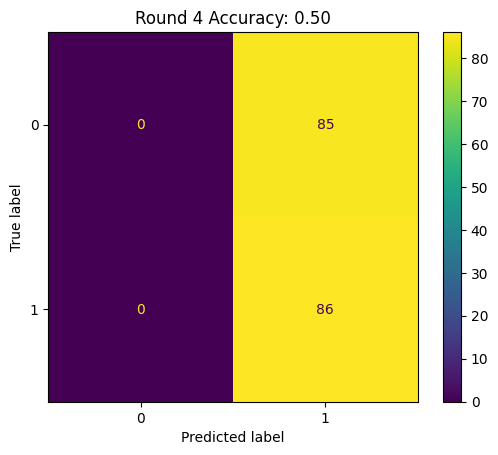

In [327]:
x_train_2021_r4 = x_train_2021[:27]
y_train_2021_r4 = y_train_2021_OHE[:27]

x_test_2021_r4 = np.concatenate((x_train_2021[27:], x_valid_2021))
y_test_2021_r4 = np.concatenate((y_train_2021_OHE[27:], y_valid_2021_OHE))

results_2021_r4, pred_2021_r4, history_2021_r4 = train_model_exp(x_train_2021_r4, y_train_2021_r4, x_test_2021_r4, y_test_2021_r4)

cf_2021_r4 = build_conf_matrix(pred_2021_r4, y_true_2021[36:])
cf_2021_r4.plot()
plt.title(f'Round 4 Accuracy: {"{:.2f}".format(results_2021_r4[1])}')
plt.show()

Model: "sequential_261"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_261 (LSTM)             (None, 32)                13824     
                                                                 
 dense_261 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 - 4s - loss: 0.5030 - accuracy: 0.5833 - mse: 0.5030 - val_loss: 0.3621 - val_accuracy: 0.6667 - val_mse: 0.3621 - lr: 0.0010 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 0.3761 - accuracy: 0.5833 - mse: 0.3761 - val_loss: 0.2874 - val_accuracy: 0.6667 - val_mse: 0.2874 - lr: 0.0010 - 54ms/epoch - 27ms/step
Epoch 3/50
2/2 - 0s - loss: 0.3308 - accuracy: 0.4792 - mse: 0.3308 - val_loss: 0.2473 - val_accuracy: 0.6667 - val_

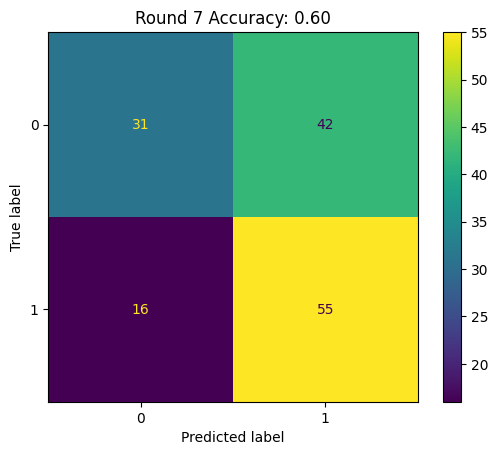

In [329]:
x_train_2021_r7 = x_train_2021[:54]
y_train_2021_r7 = y_train_2021_OHE[:54]

x_test_2021_r7 = np.concatenate((x_train_2021[54:], x_valid_2021))
y_test_2021_r7 = np.concatenate((y_train_2021_OHE[54:], y_valid_2021_OHE))

results_2021_r7, pred_2021_r7, history_2021_r7 = train_model_exp(x_train_2021_r7, y_train_2021_r7, x_test_2021_r7, y_test_2021_r7)

cf_2021_r7 = build_conf_matrix(pred_2021_r7, y_true_2021[63:])
cf_2021_r7.plot()
plt.title(f'Round 7 Accuracy: {"{:.2f}".format(results_2021_r7[1])}')
plt.show()

Model: "sequential_264"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_264 (LSTM)             (None, 32)                13824     
                                                                 
 dense_264 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 - 4s - loss: 0.4947 - accuracy: 0.5972 - mse: 0.4947 - val_loss: 0.2527 - val_accuracy: 0.8889 - val_mse: 0.2527 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.3410 - accuracy: 0.5972 - mse: 0.3410 - val_loss: 0.1794 - val_accuracy: 0.8889 - val_mse: 0.1794 - lr: 0.0010 - 60ms/epoch - 20ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2731 - accuracy: 0.6250 - mse: 0.2731 - val_loss: 0.1770 - val_accuracy: 0.8889 - val_

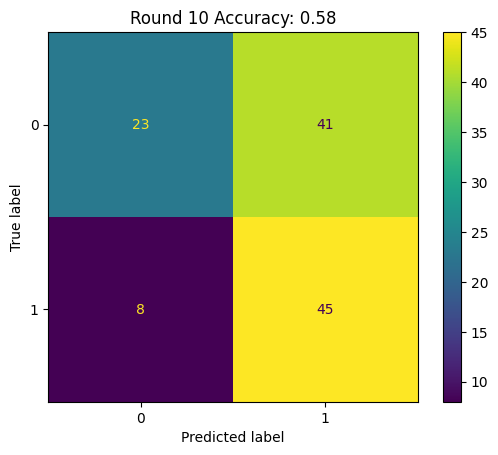

In [332]:
x_train_2021_r10 = x_train_2021[:81]
y_train_2021_r10 = y_train_2021_OHE[:81]

x_test_2021_r10 = np.concatenate((x_train_2021[81:], x_valid_2021))
y_test_2021_r10 = np.concatenate((y_train_2021_OHE[81:], y_valid_2021_OHE))

results_2021_r10, pred_2021_r10, history_2021_r10 = train_model_exp(x_train_2021_r10, y_train_2021_r10, x_test_2021_r10, y_test_2021_r10)

cf_2021_r10 = build_conf_matrix(pred_2021_r10, y_true_2021[90:])
cf_2021_r10.plot()
plt.title(f'Round 10 Accuracy: {"{:.2f}".format(results_2021_r10[1])}')
plt.show()

Model: "sequential_268"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_268 (LSTM)             (None, 32)                13824     
                                                                 
 dense_268 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 - 4s - loss: 0.4492 - accuracy: 0.5876 - mse: 0.4492 - val_loss: 0.3669 - val_accuracy: 0.3636 - val_mse: 0.3669 - lr: 0.0010 - 4s/epoch - 951ms/step
Epoch 2/50
4/4 - 0s - loss: 0.3188 - accuracy: 0.5670 - mse: 0.3188 - val_loss: 0.2655 - val_accuracy: 0.5455 - val_mse: 0.2655 - lr: 0.0010 - 66ms/epoch - 17ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2512 - accuracy: 0.5979 - mse: 0.2512 - val_loss: 0.2517 - val_accuracy: 0.4545 - v

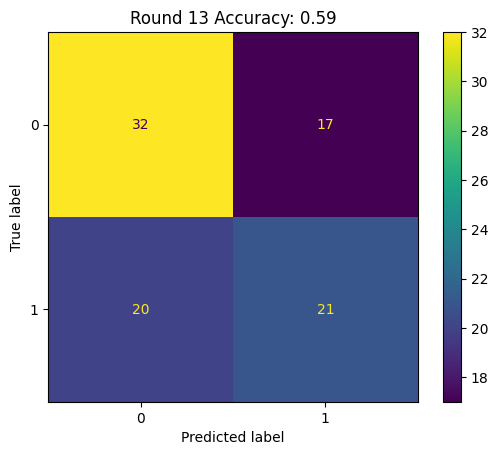

In [336]:
x_train_2021_r13 = x_train_2021[:108]
y_train_2021_r13 = y_train_2021_OHE[:108]

x_test_2021_r13 = np.concatenate((x_train_2021[108:], x_valid_2021))
y_test_2021_r13 = np.concatenate((y_train_2021_OHE[108:], y_valid_2021_OHE))

results_2021_r13, pred_2021_r13, history_2021_r13 = train_model_exp(x_train_2021_r13, y_train_2021_r13, x_test_2021_r13, y_test_2021_r13)

cf_2021_r13 = build_conf_matrix(pred_2021_r13, y_true_2021[117:])
cf_2021_r13.plot()
plt.title(f'Round 13 Accuracy: {"{:.2f}".format(results_2021_r13[1])}')
plt.show()

Model: "sequential_267"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_267 (LSTM)             (None, 32)                13824     
                                                                 
 dense_267 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 - 4s - loss: 0.4580 - accuracy: 0.5620 - mse: 0.4580 - val_loss: 0.4085 - val_accuracy: 0.2143 - val_mse: 0.4085 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/50
4/4 - 0s - loss: 0.2967 - accuracy: 0.5868 - mse: 0.2967 - val_loss: 0.2757 - val_accuracy: 0.2143 - val_mse: 0.2757 - lr: 0.0010 - 81ms/epoch - 20ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2656 - accuracy: 0.5455 - mse: 0.2656 - val_loss: 0.2586 - val_accuracy: 0.5714 - val_

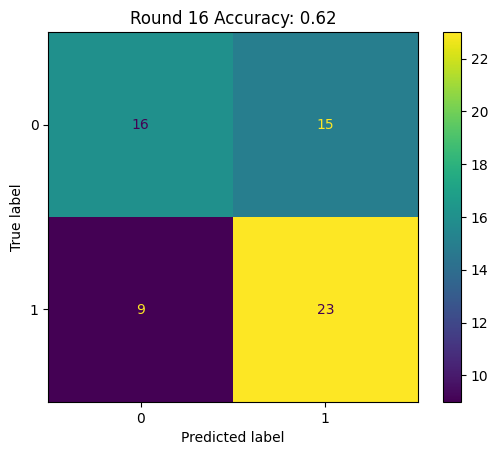

In [335]:
x_train_2021_r16 = x_train_2021[:135]
y_train_2021_r16 = y_train_2021_OHE[:135]

x_test_2021_r16 = np.concatenate((x_train_2021[135:], x_valid_2021))
y_test_2021_r16 = np.concatenate((y_train_2021_OHE[135:], y_valid_2021_OHE))

results_2021_r16, pred_2021_r16, history_2021_r16 = train_model_exp(x_train_2021_r16, y_train_2021_r16, x_test_2021_r16, y_test_2021_r16)

cf_2021_r16 = build_conf_matrix(pred_2021_r16, y_true_2021[144:])
cf_2021_r16.plot()
plt.title(f'Round 16 Accuracy: {"{:.2f}".format(results_2021_r16[1])}')
plt.show()

In [43]:
results_2021_r19, pred_2021_r19, history_2021_r19 = train_model_exp(x_train_2021, y_train_2021_OHE, x_valid_2021, y_valid_2021_OHE)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 32)                13824     
                                                                 
 dense_19 (Dense)            (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4779 - accuracy: 0.5034 - mse: 0.4779 - val_loss: 0.3070 - val_accuracy: 0.5294 - val_mse: 0.3070 - lr: 0.0010 - 4s/epoch - 746ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2718 - accuracy: 0.5310 - mse: 0.2718 - val_loss: 0.2583 - val_accuracy: 0.2941 - val_mse: 0.2583 - lr: 0.0010 - 80ms/epoch - 16ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2474 - accuracy: 0.6069 - mse: 0.2474 - val_loss: 0.2815 - val_accuracy: 0.4706 - va

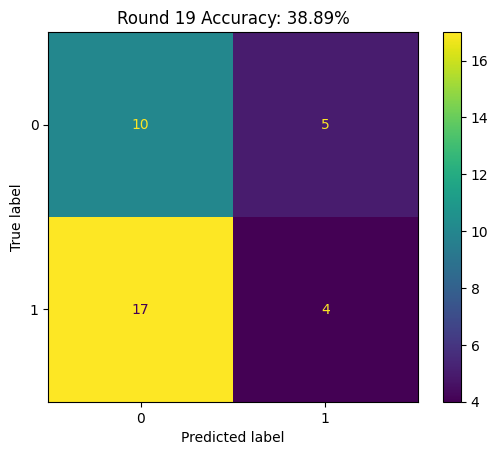

In [42]:
cf_2021_r19 = build_conf_matrix(pred_2021_r19, y_true_2021[171:])
cf_2021_r19.plot()
plt.title(f'Round 19 Accuracy: {"{:.2f}".format(results_2021_r19[1]*100)}%')
plt.show()

(Text(0.5, 1.0, 'Round 16: 61.90%'), Text(0.5, 1.0, 'Round 19: 61.11%'))

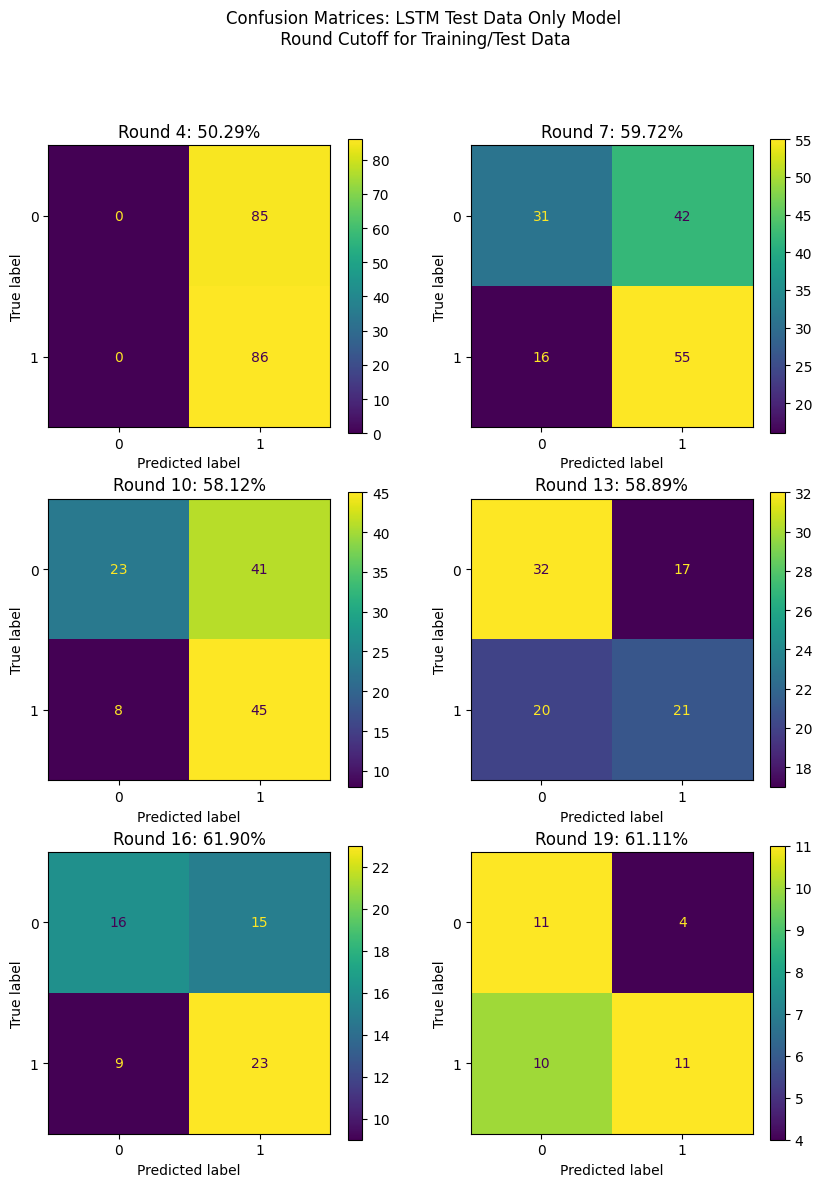

In [365]:
fig, ax = plt.subplots(3,2)
fig.set_figwidth(10)
fig.set_figheight(13)
fig.suptitle("Confusion Matrices: LSTM Test Data Only Model\n Round Cutoff for Training/Test Data")
cf_2021_r4.plot(ax=ax[0][0]), cf_2021_r7.plot(ax=ax[0][1])
cf_2021_r10.plot(ax=ax[1][0]), cf_2021_r13.plot(ax=ax[1][1])
cf_2021_r16.plot(ax=ax[2][0]), cf_2021_r19.plot(ax=ax[2][1])

ax[0][0].set_title(f'Round 4: {"{:.2f}".format(results_2021_r4[1]*100)}%'), ax[0][1].set_title(f'Round 7: {"{:.2f}".format(results_2021_r7[1]*100)}%')
ax[1][0].set_title(f'Round 10: {"{:.2f}".format(results_2021_r10[1]*100)}%'), ax[1][1].set_title(f'Round 13: {"{:.2f}".format(results_2021_r13[1]*100)}%')
ax[2][0].set_title(f'Round 16: {"{:.2f}".format(results_2021_r16[1]*100)}%'), ax[2][1].set_title(f'Round 19: {"{:.2f}".format(results_2021_r19[1]*100)}%')

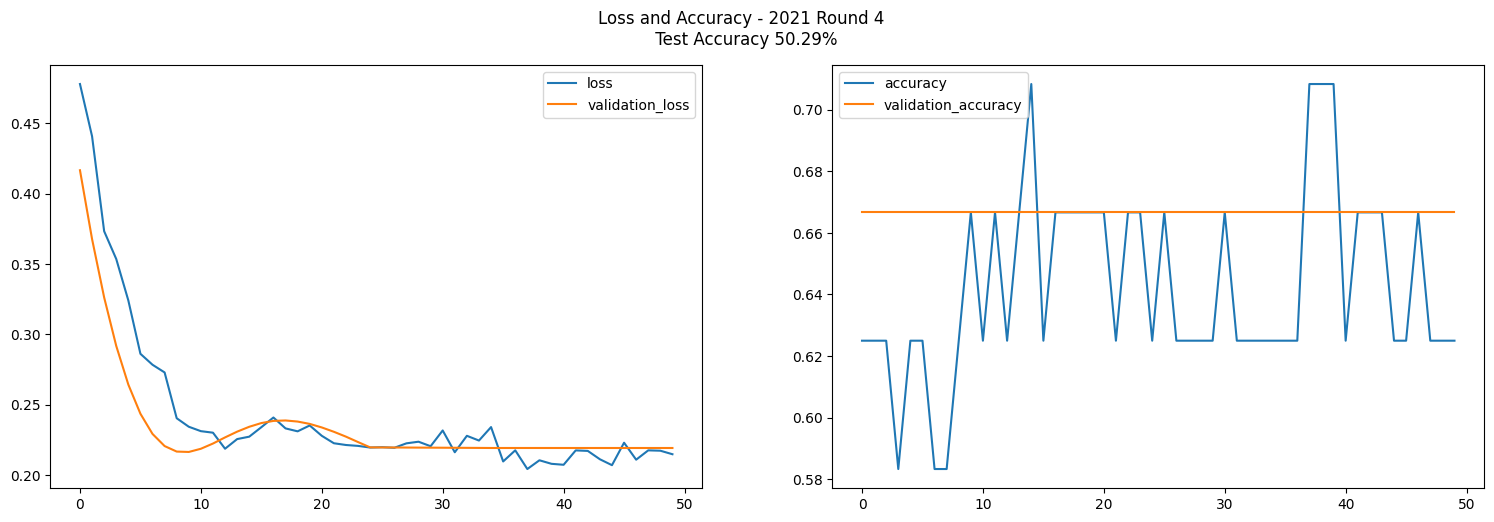

In [368]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 4 \n Test Accuracy {"{:.2f}".format(results_2021_r4[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r4.history['loss'])
plt.plot(history_2021_r4.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r4.history['accuracy'])
plt.plot(history_2021_r4.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

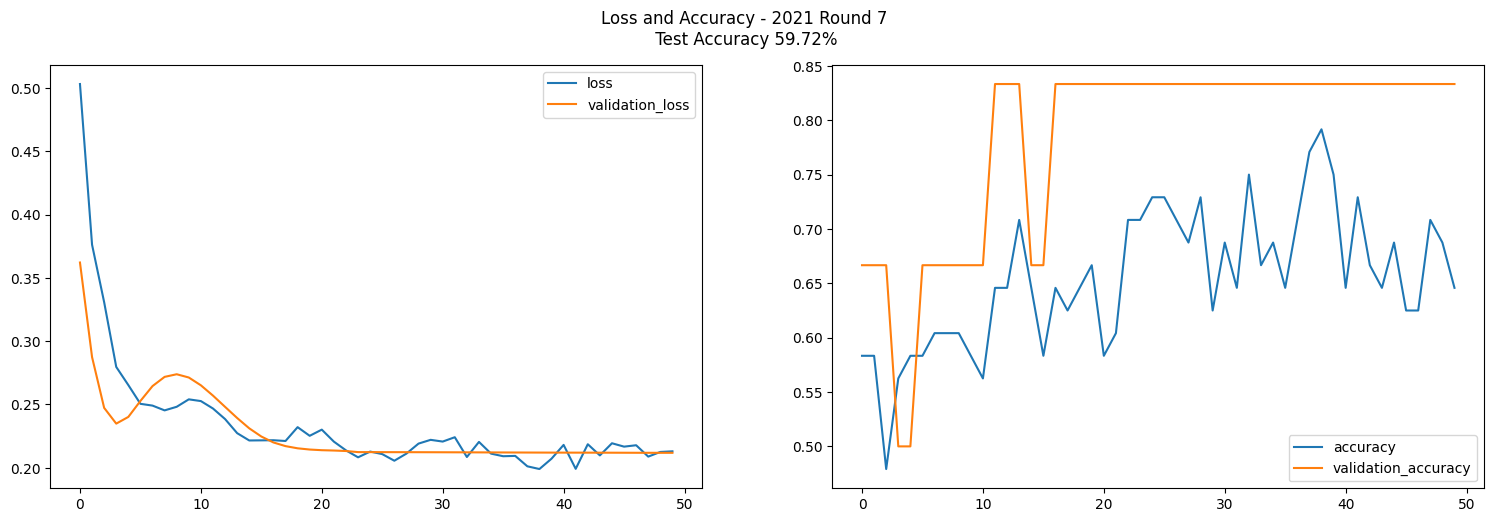

In [369]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 7\n Test Accuracy {"{:.2f}".format(results_2021_r7[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r7.history['loss'])
plt.plot(history_2021_r7.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r7.history['accuracy'])
plt.plot(history_2021_r7.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

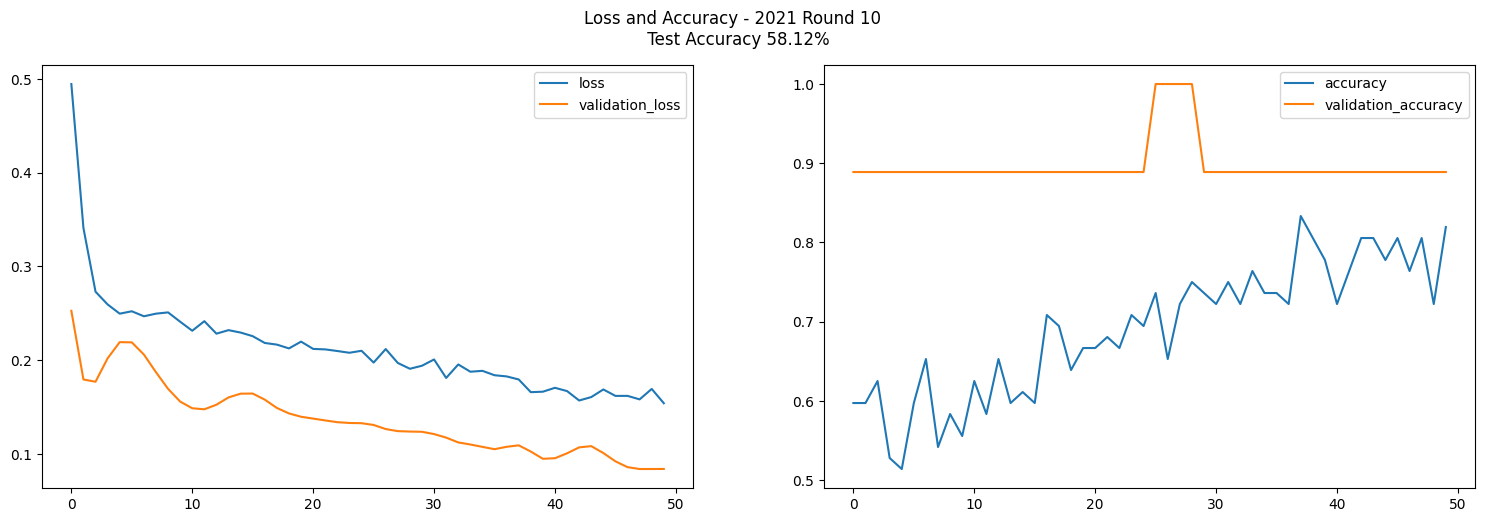

In [370]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 10 \n Test Accuracy {"{:.2f}".format(results_2021_r10[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r10.history['loss'])
plt.plot(history_2021_r10.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r10.history['accuracy'])
plt.plot(history_2021_r10.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

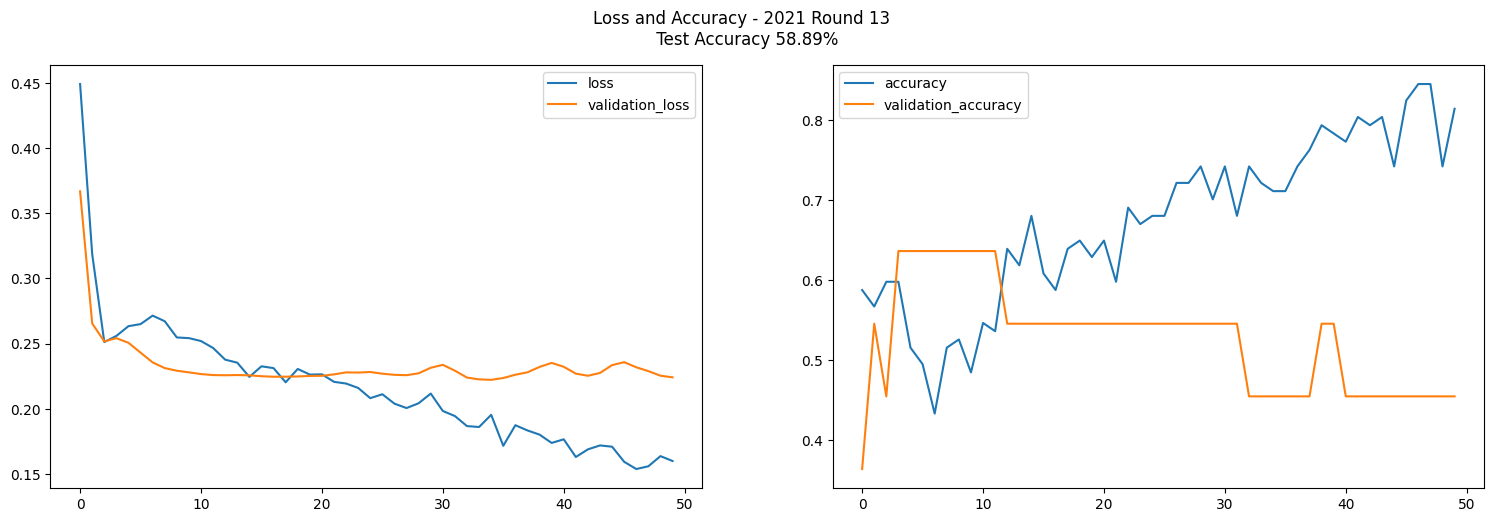

In [371]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 13 \n Test Accuracy {"{:.2f}".format(results_2021_r13[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r13.history['loss'])
plt.plot(history_2021_r13.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r13.history['accuracy'])
plt.plot(history_2021_r13.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

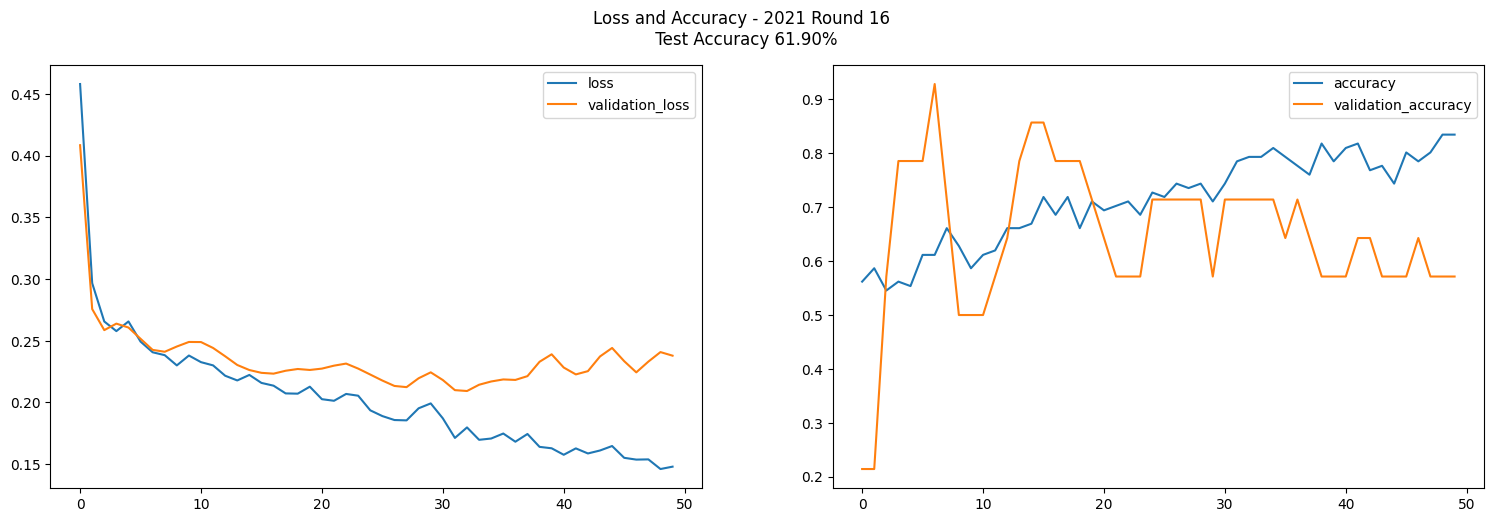

In [372]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 16 \n Test Accuracy {"{:.2f}".format(results_2021_r16[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r16.history['loss'])
plt.plot(history_2021_r16.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r16.history['accuracy'])
plt.plot(history_2021_r16.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

In [1]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 19 \n Test Accuracy {"{:.2f}".format(results_2021_r19[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r19.history['loss'])
plt.plot(history_2021_r19.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r19.history['accuracy'])
plt.plot(history_2021_r19.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

NameError: name 'plt' is not defined

In [17]:
def train_model_1_2( xTrain, yTrain, xValid , yValid):
    random.seed(26)
    model = Sequential()
    model.add(LSTM( 32 ,input_shape = (10,75), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))
    model.add(LSTM(64, dropout=0.3))
    model.add(Dense(32))
    model.add(Dense(2, activation="tanh"))
    model.build()   
    model.summary()
    model.compile( optimizer = "adam" , loss = 'mean_squared_error' , metrics = ['accuracy', 'mse'])

    reduce_lr = ReduceLROnPlateau( monitor = 'accuracy', factor = 0.01, patience=10, cooldown=0)
    
    callbacks = [ reduce_lr ]
    train_history = model.fit( xTrain, yTrain , epochs = 50, shuffle=False, callbacks=callbacks, verbose = 2, validation_split = 0.1)

    score = model.evaluate( xValid , yValid )
    pred = model.predict(xValid)
    model.save("LSTM_1")
    
    print( "Accuracy: {:0.4}".format( score[1] ))
    print( "Loss:", score[0] )
    return score, pred, train_history

results_2012, pred_2012, history_2012 = train_model_1_2(x_train_2012, y_train_2012_OHE, x_valid_2012, y_valid_2012_OHE) 
results_2013, pred_2013, history_2013 = train_model_1_2(x_train_2013, y_train_2013_OHE, x_valid_2013, y_valid_2013_OHE) 
results_2014, pred_2014, history_2014 = train_model_1_2(x_train_2014, y_train_2014_OHE, x_valid_2014, y_valid_2014_OHE) 
results_2015, pred_2015, history_2015 = train_model_1_2(x_train_2015, y_train_2015_OHE, x_valid_2015, y_valid_2015_OHE) 
results_2016, pred_2016, history_2016 = train_model_1_2(x_train_2016, y_train_2016_OHE, x_valid_2016, y_valid_2016_OHE) 
results_2017, pred_2017, history_2017 = train_model_1_2(x_train_2017, y_train_2017_OHE, x_valid_2017, y_valid_2017_OHE) 
results_2018, pred_2018, history_2018 = train_model_1_2(x_train_2018, y_train_2018_OHE, x_valid_2018, y_valid_2018_OHE) 
results_2019, pred_2019, history_2019 = train_model_1_2(x_train_2019, y_train_2019_OHE, x_valid_2019, y_valid_2019_OHE)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 32)            13824     
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 40,802
Trainable params: 40,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 8s - loss: 0.4873 - accuracy: 0.5448 - mse: 0.4873 - val_loss: 0.2373 - val_accuracy: 0.7059 - val_mse: 0.2373 - lr: 0.0010 - 8s/epoch - 2s/step
Epoch 2/50
5/5 - 0s - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.5556
Loss: 0.2422068864107132
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 32)            13824     
                                                                 
 lstm_3 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 40,802
Trainable params: 40,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 7s - loss: 0.4750 - accuracy: 0.5517 - mse: 0.4750 - val_loss: 0.2655 - val_accuracy: 0.5294 - val_mse: 0.2655 - lr: 0.0010

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.5833
Loss: 0.26857760548591614
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 32)            13824     
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 40,802
Trainable params: 40,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 7s - loss: 0.4811 - accuracy: 0.5724 - mse: 0.4811 - val_loss: 0.2528 - val_accuracy: 0.5882 - val_mse: 0.2528 - lr: 0.001

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.5556
Loss: 0.2727149724960327
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 32)            13824     
                                                                 
 lstm_7 (LSTM)               (None, 64)                24832     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 40,802
Trainable params: 40,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 7s - loss: 0.4818 - accuracy: 0.5139 - mse: 0.4818 - val_loss: 0.2643 - val_accuracy: 0.5882 - val_mse: 0.2643 - lr: 0.0010

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6667
Loss: 0.2312033474445343
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 32)            13824     
                                                                 
 lstm_9 (LSTM)               (None, 64)                24832     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 2)                 66        
                                                                 
Total params: 40,802
Trainable params: 40,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 7s - loss: 0.4788 - accuracy: 0.5931 - mse: 0.4788 - val_loss: 0.2253 - val_accuracy: 0.7059 - val_mse: 0.2253 - lr: 0.0010

2/2 [==============================] - 1s 5ms/step


INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.4722
Loss: 0.25041812658309937
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_11 (LSTM)              (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 40,802
Trainable params: 40,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 7s - loss: 0.4724 - accuracy: 0.5586 - mse: 0.4724 - val_loss: 0.2386 - val_accuracy: 0.6471 - val_mse: 0.2386 - lr: 0.001

2/2 [==============================] - 1s 6ms/step


INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6944
Loss: 0.22134895622730255
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_13 (LSTM)              (None, 64)                24832     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 2)                 66        
                                                                 
Total params: 40,802
Trainable params: 40,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 6s - loss: 0.4691 - accuracy: 0.5724 - mse: 0.4691 - val_loss: 0.2512 - val_accuracy: 0.5882 - val_mse: 0.2512 - lr: 0.001

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.7778
Loss: 0.16797514259815216
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_15 (LSTM)              (None, 64)                24832     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 2)                 66        
                                                                 
Total params: 40,802
Trainable params: 40,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 8s - loss: 0.4833 - accuracy: 0.5448 - mse: 0.4833 - val_loss: 0.2517 - val_accuracy: 0.5882 - val_mse: 0.2517 - lr: 0.001

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6944
Loss: 0.21032851934432983


In [21]:
def train_model_1_3( xTrain, yTrain, xValid , yValid):
    random.seed(26)
    model = Sequential()
    model.add(LSTM( 32 ,input_shape = (10,75), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))
    model.add(LSTM(64, dropout=0.3, return_sequences=True))
    model.add(LSTM(32, dropout=0.2, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(2, activation="tanh"))
    model.build()   
    model.summary()
    model.compile( optimizer = "adam" , loss = 'mean_squared_error' , metrics = ['accuracy', 'mse'])

    reduce_lr = ReduceLROnPlateau( monitor = 'accuracy', factor = 0.01, patience=10, cooldown=0)
    
    callbacks = [ reduce_lr ]
    train_history = model.fit( xTrain, yTrain , epochs = 50, shuffle=False, callbacks=callbacks, verbose = 2, validation_split = 0.1)

    score = model.evaluate( xValid , yValid )
    pred = model.predict(xValid)
    model.save("LSTM_1")
    
    print( "Accuracy: {:0.4}".format( score[1] ))
    print( "Loss:", score[0] )
    return score, pred, train_history

results_2012, pred_2012, history_2012 = train_model_1_3(x_train_2012, y_train_2012_OHE, x_valid_2012, y_valid_2012_OHE) 
results_2013, pred_2013, history_2013 = train_model_1_3(x_train_2013, y_train_2013_OHE, x_valid_2013, y_valid_2013_OHE) 
results_2014, pred_2014, history_2014 = train_model_1_3(x_train_2014, y_train_2014_OHE, x_valid_2014, y_valid_2014_OHE) 
results_2015, pred_2015, history_2015 = train_model_1_3(x_train_2015, y_train_2015_OHE, x_valid_2015, y_valid_2015_OHE) 
results_2016, pred_2016, history_2016 = train_model_1_3(x_train_2016, y_train_2016_OHE, x_valid_2016, y_valid_2016_OHE) 
results_2017, pred_2017, history_2017 = train_model_1_3(x_train_2017, y_train_2017_OHE, x_valid_2017, y_valid_2017_OHE) 
results_2018, pred_2018, history_2018 = train_model_1_3(x_train_2018, y_train_2018_OHE, x_valid_2018, y_valid_2018_OHE) 
results_2019, pred_2019, history_2019 = train_model_1_3(x_train_2019, y_train_2019_OHE, x_valid_2019, y_valid_2019_OHE)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_33 (LSTM)              (None, 10, 64)            24832     
                                                                 
 lstm_34 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_35 (LSTM)              (None, 16)                3136      
                                                                 
 dense_32 (Dense)            (None, 32)                544       
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 2)               

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.4167
Loss: 0.3166697323322296
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_37 (LSTM)              (None, 10, 64)            24832     
                                                                 
 lstm_38 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_39 (LSTM)              (None, 16)                3136      
                                                                 
 dense_35 (Dense)            (None, 32)                544       
                                                                 
 dense_36 (Dense)            (None, 16)                528       
                                                                 
 dense_37 (

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.5833
Loss: 0.2424807846546173
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_41 (LSTM)              (None, 10, 64)            24832     
                                                                 
 lstm_42 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_43 (LSTM)              (None, 16)                3136      
                                                                 
 dense_38 (Dense)            (None, 32)                544       
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.5556
Loss: 0.2483808696269989
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_45 (LSTM)              (None, 10, 64)            24832     
                                                                 
 lstm_46 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_47 (LSTM)              (None, 16)                3136      
                                                                 
 dense_41 (Dense)            (None, 32)                544       
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.4167
Loss: 0.2604365050792694
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_49 (LSTM)              (None, 10, 64)            24832     
                                                                 
 lstm_50 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_51 (LSTM)              (None, 16)                3136      
                                                                 
 dense_44 (Dense)            (None, 32)                544       
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dense_46 (

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.4722
Loss: 0.2593230605125427
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_53 (LSTM)              (None, 10, 64)            24832     
                                                                 
 lstm_54 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_55 (LSTM)              (None, 16)                3136      
                                                                 
 dense_47 (Dense)            (None, 32)                544       
                                                                 
 dense_48 (Dense)            (None, 16)                528       
                                                                 
 dense_49 (

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6944
Loss: 0.23329003155231476
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_57 (LSTM)              (None, 10, 64)            24832     
                                                                 
 lstm_58 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_59 (LSTM)              (None, 16)                3136      
                                                                 
 dense_50 (Dense)            (None, 32)                544       
                                                                 
 dense_51 (Dense)            (None, 16)                528       
                                                                 
 dense_52 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6111
Loss: 0.23310157656669617
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 10, 32)            13824     
                                                                 
 lstm_61 (LSTM)              (None, 10, 64)            24832     
                                                                 
 lstm_62 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_63 (LSTM)              (None, 16)                3136      
                                                                 
 dense_53 (Dense)            (None, 32)                544       
                                                                 
 dense_54 (Dense)            (None, 16)                528       
                                                                 
 dense_55 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.4167
Loss: 0.2868309020996094


In [22]:
results = pd.DataFrame(data = [results_2012[:2],results_2013[:2],results_2014[:2],results_2015[:2],results_2016[:2],
                               results_2017[:2],results_2018[:2],results_2019[:2]],
                            index = ['2012', '2013', '2014','2015','2016','2017','2018','2019'],
                            columns = ['loss', 'accuracy'])
sum(results['accuracy'])/8


0.5208333246409893

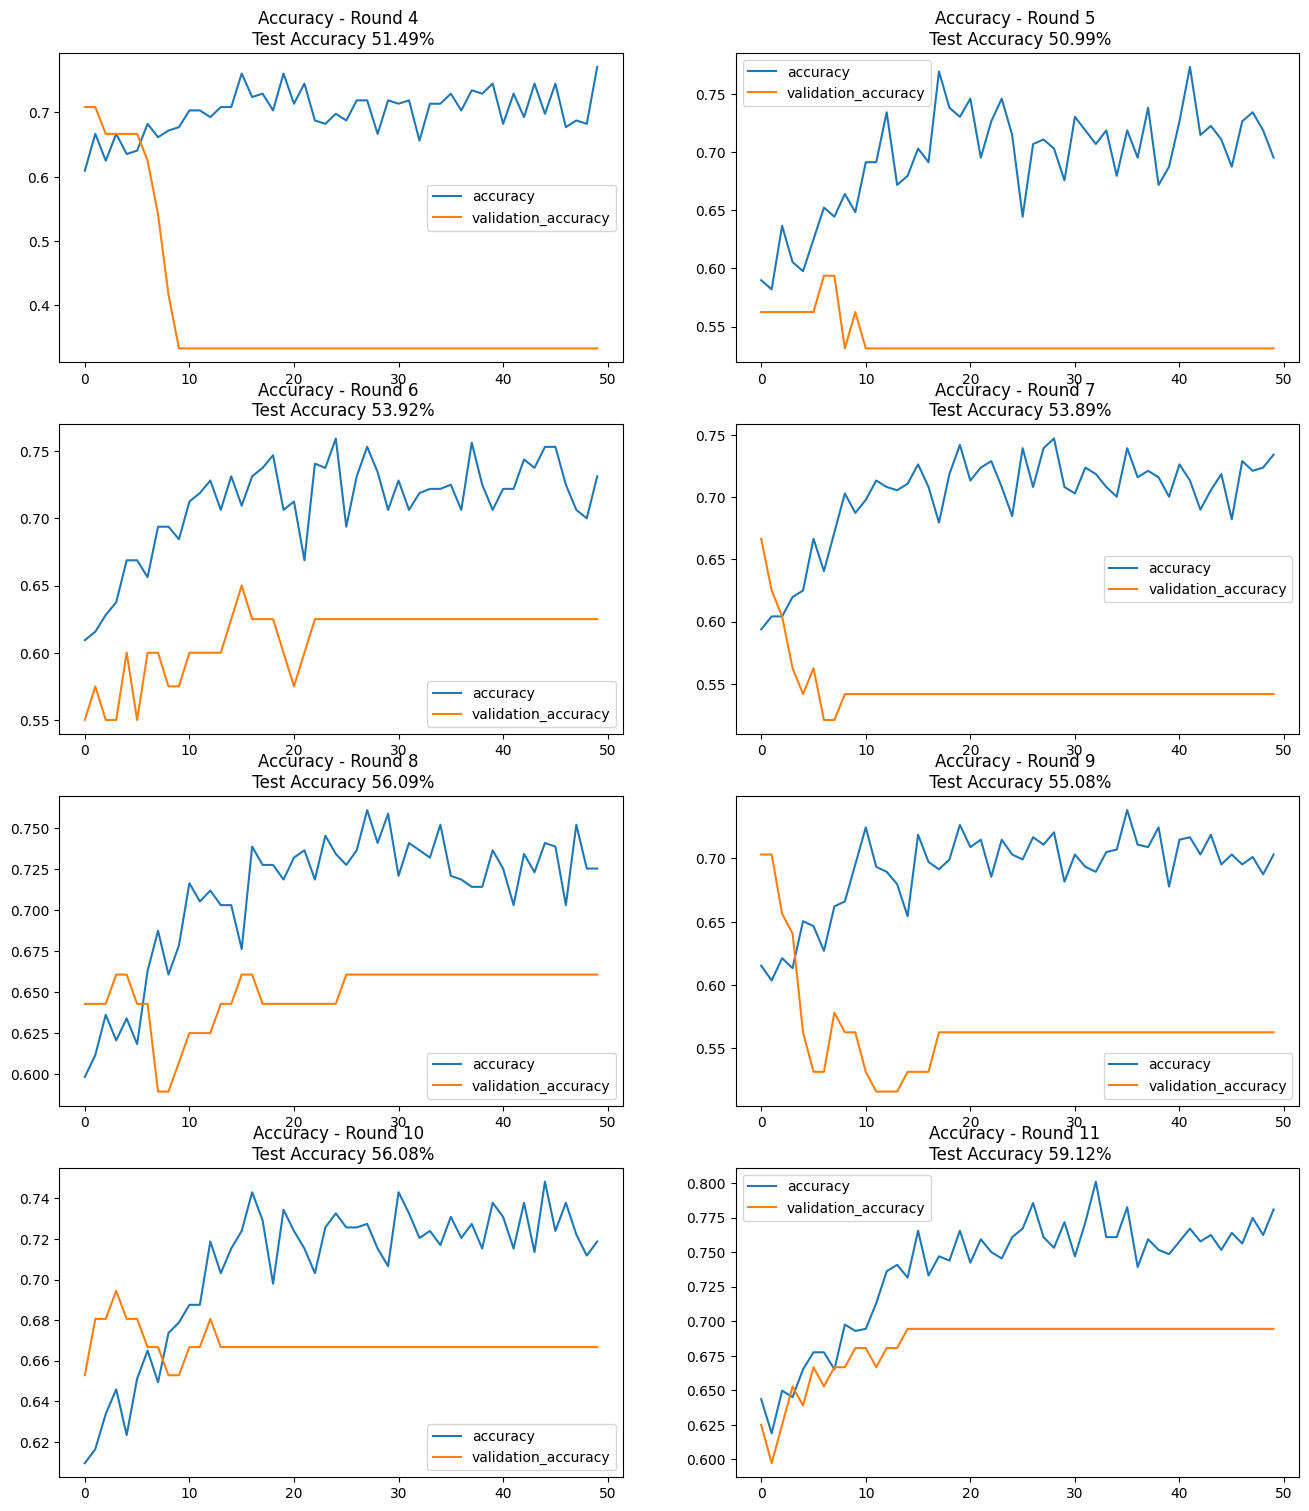

In [47]:
fig = plt.gcf()
fig.set_size_inches(16, 18.5)
plt.subplot(4,2,1)
plt.title(f'Accuracy - Round 4 \n Test Accuracy {"{:.2f}".format(test_acc_r4)}%')
plt.plot(acc_r4)
plt.plot(val_acc_r4)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,2)
plt.title(f'Accuracy - Round 5 \n Test Accuracy {"{:.2f}".format(test_acc_r5)}%')
plt.plot(acc_r5)
plt.plot(val_acc_r5)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,3)
plt.title(f'Accuracy - Round 6 \n Test Accuracy {"{:.2f}".format(test_acc_r6)}%')
plt.plot(acc_r6)
plt.plot(val_acc_r6)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,4)
plt.title(f'Accuracy - Round 7 \n Test Accuracy {"{:.2f}".format(test_acc_r7)}%')
plt.plot(acc_r7)
plt.plot(val_acc_r7)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,5)
plt.title(f'Accuracy - Round 8 \n Test Accuracy {"{:.2f}".format(test_acc_r8)}%')
plt.plot(acc_r8)
plt.plot(val_acc_r8)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,6)
plt.title(f'Accuracy - Round 9 \n Test Accuracy {"{:.2f}".format(test_acc_r9)}%')
plt.plot(acc_r9)
plt.plot(val_acc_r9)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,7)
plt.title(f'Accuracy - Round 10 \n Test Accuracy {"{:.2f}".format(test_acc_r10)}%')
plt.plot(acc_r10)
plt.plot(val_acc_r10)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,8)
plt.title(f'Accuracy - Round 11 \n Test Accuracy {"{:.2f}".format(test_acc_r11)}%')
plt.plot(acc_r11)
plt.plot(val_acc_r11)
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

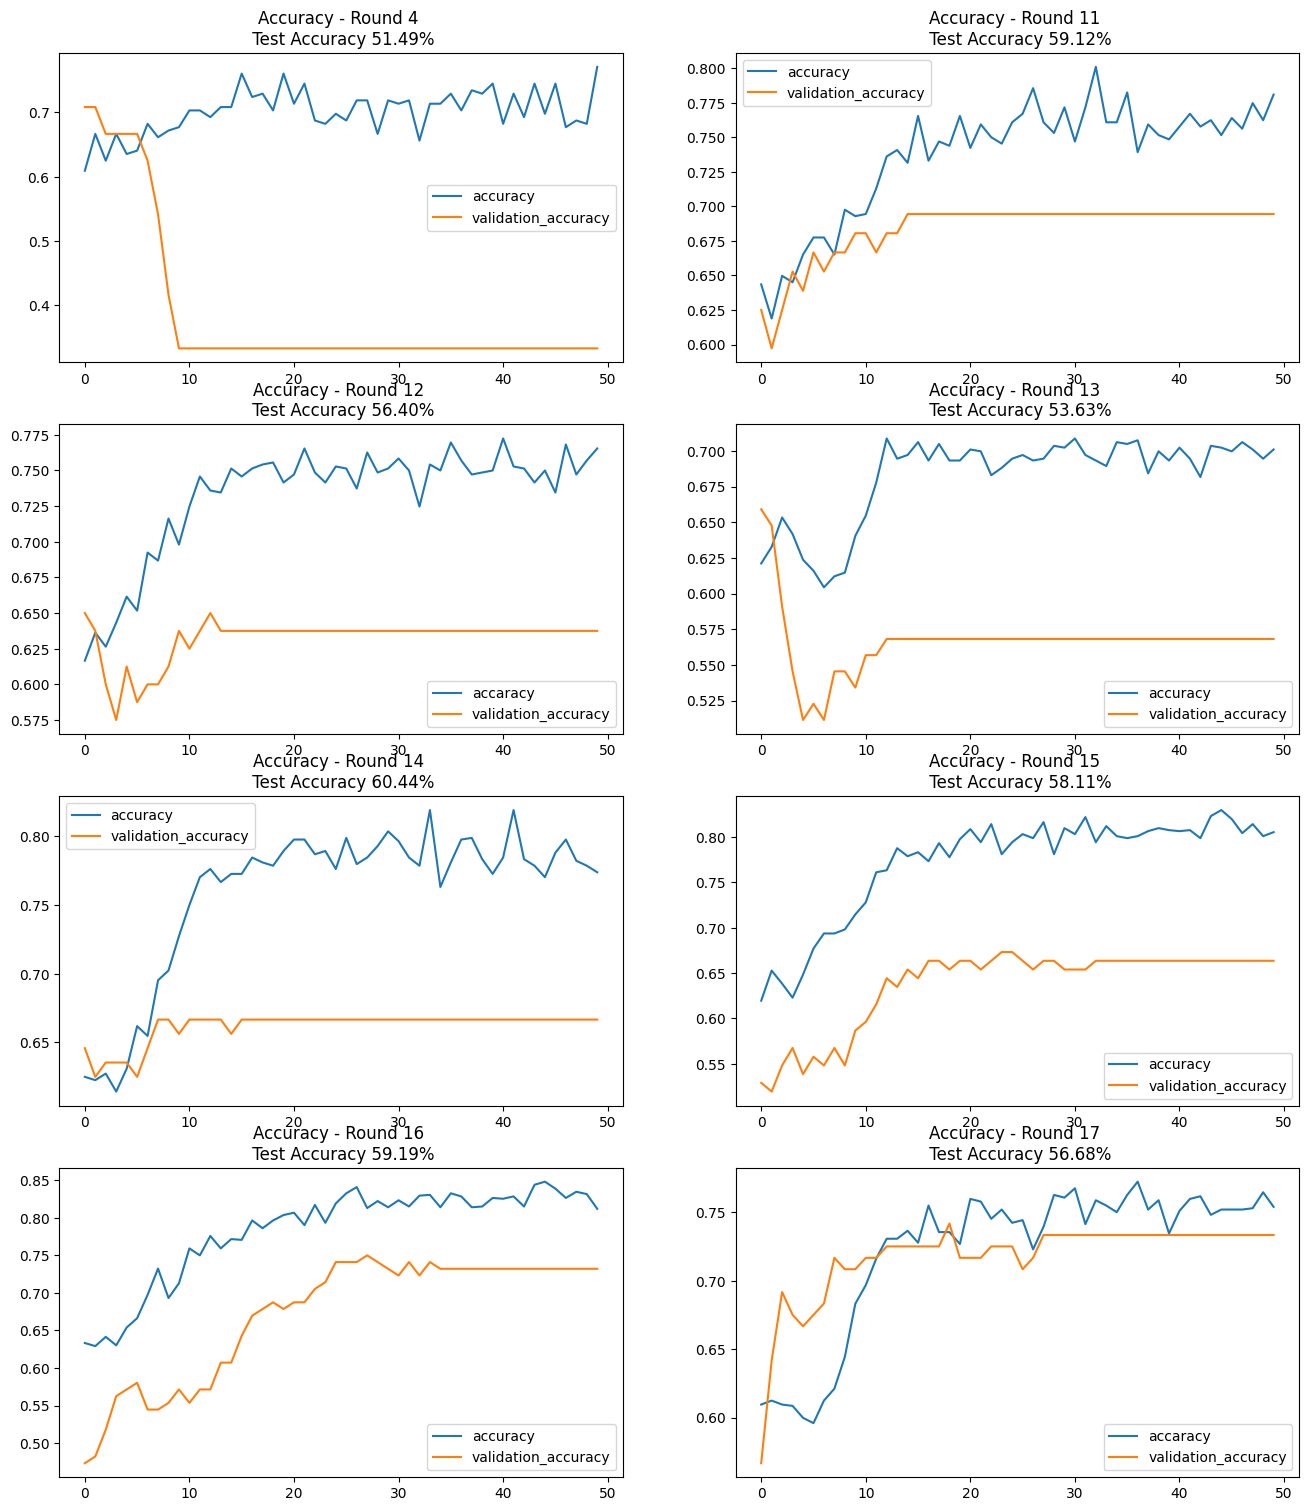

In [49]:
fig = plt.gcf()
fig.set_size_inches(16, 18.5)
plt.subplot(4,2,1)
plt.title(f'Accuracy - Round 4 \n Test Accuracy {"{:.2f}".format(test_acc_r4)}%')
plt.plot(acc_r4)
plt.plot(val_acc_r4)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,2)
plt.title(f'Accuracy - Round 11 \n Test Accuracy {"{:.2f}".format(test_acc_r11)}%')
plt.plot(acc_r11)
plt.plot(val_acc_r11)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,3)
plt.title(f'Accuracy - Round 12 \n Test Accuracy {"{:.2f}".format(test_acc_r12)}%')
plt.plot(acc_r12)
plt.plot(val_acc_r12)
plt.legend(['accaracy', 'validation_accuracy'])
plt.subplot(4,2,4)
plt.title(f'Accuracy - Round 13 \n Test Accuracy {"{:.2f}".format(test_acc_r13)}%')
plt.plot(acc_r13)
plt.plot(val_acc_r13)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,5)
plt.title(f'Accuracy - Round 14 \n Test Accuracy {"{:.2f}".format(test_acc_r14)}%')
plt.plot(acc_r14)
plt.plot(val_acc_r14)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,6)
plt.title(f'Accuracy - Round 15 \n Test Accuracy {"{:.2f}".format(test_acc_r15)}%')
plt.plot(acc_r15)
plt.plot(val_acc_r15)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,7)
plt.title(f'Accuracy - Round 16 \n Test Accuracy {"{:.2f}".format(test_acc_r16)}%')
plt.plot(acc_r16)
plt.plot(val_acc_r16)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,8)
plt.title(f'Accuracy - Round 17 \n Test Accuracy {"{:.2f}".format(test_acc_r17)}%')
plt.plot(acc_r17)
plt.plot(val_acc_r17)
plt.legend(['accaracy', 'validation_accuracy'])
plt.subplot(4,2,9)
plt.title(f'Accuracy - Round 18 \n Test Accuracy {"{:.2f}".format(test_acc_r18)}%')
plt.plot(acc_r18)
plt.plot(val_acc_r18)
plt.legend(['accuracy', 'validation_accuracy'])
plt.subplot(4,2,10)
plt.title(f'Accuracy - Round 19 \n Test Accuracy {"{:.2f}".format(test_acc_r19)}%')
plt.plot(acc_r19)
plt.plot(val_acc_r19)
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()